# Introduction
The project our group members are currently focusing on can be generalized as the problem with regard to <b>"Intrusive Detection System(IDS)"</b>. IDS is one type of threat where people with an area of expertise in Networking are reluctant to meet. It can be categorized into three groups:
- Signature-Based IDS
- Anomaly-Based IDS
- Hybrid IDS


Signature-Based IDS refers to system where labels are already identified. As suggested by its name, a high performance efficiency is more likely to be obtained in executing labels that are not unknown, but those without designated patterns usually do not achieve an efficacious result compared to those known labels.

Anomaly-Based IDS, based the its special functionality and application, is another category that can resolve the drawback shown above that is troubled with many network programmers. For IDSs without labels, it plays an imperative role in that both the training errors and the testing errors during the process of training the model can be decreased significantly. However, while concentrating on those labels with specific signatures, its corresponding efficiency cannot be performed satisfactoraily. Therefore, a more comprehensive approach should be considered wisely so that both the training errors and the testing errors in terms of two types above can be optimized.

Finally, a hybrid approach by integrating Signature-Based IDS and Anomaly-Based altogether appears in that IDSs containing labels and non-labels can be tested rigorously.




# Purpose
According to the instructions illustrated above, the main purpose of this research is to simulate and evaluate the scenario of IDS in a dataset from Kaggle https://www.kaggle.com/datasets/aryashah2k/nfuqnidsv2-network-intrusion-detection-dataset with respect to four machine learning models: Decision Tree, Naive Bayes, K-Nearest Neighbor, and Support Vector Machine(SVM).

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.inf)
np.set_printoptions(precision=3)

network = pd.read_csv('NF-UQ-NIDS-v2.csv', nrows=20000)
network.head(5)

IPV4_SRC_ADDR  L4_SRC_PORT  IPV4_DST_ADDR  L4_DST_PORT  PROTOCOL  \
0  192.168.100.148        65389  192.168.100.7           80         6   
1  192.168.100.148        11154  192.168.100.5           80         6   
2     192.168.1.31        42062   192.168.1.79         1041         6   
3     192.168.1.34        46849   192.168.1.79         9110         6   
4     192.168.1.30        50360  192.168.1.152         1084         6   

   L7_PROTO  IN_BYTES  IN_PKTS  OUT_BYTES  OUT_PKTS  TCP_FLAGS  \
0       7.0       420        3          0         0          2   
1       7.0       280        2         40         1         22   
2       0.0        44        1         40         1         22   
3       0.0        44        1         40         1         22   
4       0.0        44        1         40         1         22   

   CLIENT_TCP_FLAGS  SERVER_TCP_FLAGS  FLOW_DURATION_MILLISECONDS  \
0                 2                 0                     4293092   
1                 2                20                     4294499   
2                 2                20                           0   
3                 2                20                           0   
4                 2                20                           0   

   DURATION_IN  DURATION_OUT  MIN_TTL  MAX_TTL  LONGEST_FLOW_PKT  \
0         1875             0       64       64               140   
1          453             0       64       64               140   
2            0             0        0        0                44   
3            0             0        0        0                44   
4            0             0        0        0                44   

   SHORTEST_FLOW_PKT  MIN_IP_PKT_LEN  MAX_IP_PKT_LEN  SRC_TO_DST_SECOND_BYTES  \
0                140               0             140                 140280.0   
1                 40              40             140                    280.0   
2                 40              40              44                     44.0   
3                 40              40              44                     44.0   
4                 40              40              44                     44.0   

   DST_TO_SRC_SECOND_BYTES  RETRANSMITTED_IN_BYTES  RETRANSMITTED_IN_PKTS  \
0                      0.0                     140                      1   
1                     40.0                       0                      0   
2                     40.0                       0                      0   
3                     40.0                       0                      0   
4                     40.0                       0                      0   

   RETRANSMITTED_OUT_BYTES  RETRANSMITTED_OUT_PKTS  SRC_TO_DST_AVG_THROUGHPUT  \
0                        0                       0                    1120000   
1                        0                       0                          0   
2                        0                       0                     352000   
3                        0                       0                     352000   
4                        0                       0                     352000   

   DST_TO_SRC_AVG_THROUGHPUT  NUM_PKTS_UP_TO_128_BYTES  \
0                          0                         0   
1                     320000                         1   
2                     320000                         2   
3                     320000                         2   
4                     320000                         2   

   NUM_PKTS_128_TO_256_BYTES  NUM_PKTS_256_TO_512_BYTES  \
0                          3                          0   
1                          2                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   NUM_PKTS_512_TO_1024_BYTES  NUM_PKTS_1024_TO_1514_BYTES  TCP_WIN_MAX_IN  \
0                           0                            0             512   
1                           0                   

In [3]:
network

IPV4_SRC_ADDR  L4_SRC_PORT  IPV4_DST_ADDR  L4_DST_PORT  PROTOCOL  \
0      192.168.100.148        65389  192.168.100.7           80         6   
1      192.168.100.148        11154  192.168.100.5           80         6   
2         192.168.1.31        42062   192.168.1.79         1041         6   
3         192.168.1.34        46849   192.168.1.79         9110         6   
4         192.168.1.30        50360  192.168.1.152         1084         6   
...                ...          ...            ...          ...       ...   
19995  192.168.100.148        29287  192.168.100.5           80         6   
19996  192.168.100.147        43237  192.168.100.5           80         6   
19997  213.202.230.207        11113   172.31.67.86         3389         6   
19998     192.168.1.38        36494  192.168.1.184          443         6   
19999       59.166.0.7        29325  149.171.126.9           80         6   

       L7_PROTO  IN_BYTES  IN_PKTS  OUT_BYTES  OUT_PKTS  TCP_FLAGS  \
0           7.0       420        3          0         0          2   
1           7.0       280        2         40         1         22   
2           0.0        44        1         40         1         22   
3           0.0        44        1         40         1         22   
4           0.0        44        1         40         1         22   
...         ...       ...      ...        ...       ...        ...   
19995       7.0       420        3          0         0          2   
19996       7.0       280        2          0         0          2   
19997       0.0      1974       13       2143        10        223   
19998      91.0       328        6        224         4         19   
19999       7.0      1580       12      10168        18         27   

       CLIENT_TCP_FLAGS  SERVER_TCP_FLAGS  FLOW_DURATION_MILLISECONDS  \
0                     2                 0                     4293092   
1                     2                20                     4294499   
2                     2                20                           0   
3                     2                20                           0   
4                     2                20                           0   
...                 ...               ...                         ...   
19995                 2                 0                     4293514   
19996                 2                 0                     4293764   
19997               219                30                           0   
19998                18                19                     4294717   
19999                27                27                           0   

       DURATION_IN  DURATION_OUT  MIN_TTL  MAX_TTL  LONGEST_FLOW_PKT  \
0             1875             0       64       64               140   
1              453             0       64       64               140   
2                0             0        0        0                44   
3                0             0        0        0                44   
4                0             0        0        0                44   
...            ...           ...      ...      ...               ...   
19995         1453             0       64       64               140   
19996         1203             0       64       64               140   
19997            0             0      101      101              1219   
19998          250           250       64       64                60   
19999            0             0       31       32              1500   

       SHORTEST_FLOW_PKT  MIN_IP_PKT_LEN  MAX_IP_PKT_LEN  \
0                    140               0             140   
1                     40              40             140   
2                     40              40              44   
3                     40              40              44   
4                     40              40              44   
...                  ...             ...             ...   
19995                140               0             140   
19996                

# Procedure/Implementation #

## Step 1: Data Analysis & Visualization ##
### Purpose ###
To start the project efficiently, several primitive data analysis techniques are necessary to be applied so that we need to obtain several basic knowledge with regard to the data above, including but not limited to the following traits:
- (1) check how many dataset in total and the the number of network data in each dataset
- (2) find out the name and the data type in each column
- (3) record the dimension of the dataset
- (4) examine whether the dataset encompasses any null values
- (5) observe the distribution of network attack types

In [4]:
network['Dataset'].value_counts()

NF-BoT-IoT-v2            9987
NF-CSE-CIC-IDS2018-v2    5021
NF-ToN-IoT-v2            4410
NF-UNSW-NB15-v2           582
Name: Dataset, dtype: int64

In [5]:
network.dtypes

IPV4_SRC_ADDR                   object
L4_SRC_PORT                      int64
IPV4_DST_ADDR                   object
L4_DST_PORT                      int64
PROTOCOL                         int64
L7_PROTO                       float64
IN_BYTES                         int64
IN_PKTS                          int64
OUT_BYTES                        int64
OUT_PKTS                         int64
TCP_FLAGS                        int64
CLIENT_TCP_FLAGS                 int64
SERVER_TCP_FLAGS                 int64
FLOW_DURATION_MILLISECONDS       int64
DURATION_IN                      int64
DURATION_OUT                     int64
MIN_TTL                          int64
MAX_TTL                          int64
LONGEST_FLOW_PKT                 int64
SHORTEST_FLOW_PKT                int64
MIN_IP_PKT_LEN                   int64
MAX_IP_PKT_LEN                   int64
SRC_TO_DST_SECOND_BYTES        float64
DST_TO_SRC_SECOND_BYTES        float64
RETRANSMITTED_IN_BYTES           int64
RETRANSMITTED_IN_PKTS    

In [6]:
print("The dimension of the dataset extracted is: ", network.shape)
print("How many rows does this dataset contain: ", network.shape[0])
print("How many columns does this dataset contain: ", network.shape[1])

The dimension of the dataset extracted is:  (20000, 46)
How many rows does this dataset contain:  20000
How many columns does this dataset contain:  46


In [7]:
network.isnull().any()

IPV4_SRC_ADDR                  False
L4_SRC_PORT                    False
IPV4_DST_ADDR                  False
L4_DST_PORT                    False
PROTOCOL                       False
L7_PROTO                       False
IN_BYTES                       False
IN_PKTS                        False
OUT_BYTES                      False
OUT_PKTS                       False
TCP_FLAGS                      False
CLIENT_TCP_FLAGS               False
SERVER_TCP_FLAGS               False
FLOW_DURATION_MILLISECONDS     False
DURATION_IN                    False
DURATION_OUT                   False
MIN_TTL                        False
MAX_TTL                        False
LONGEST_FLOW_PKT               False
SHORTEST_FLOW_PKT              False
MIN_IP_PKT_LEN                 False
MAX_IP_PKT_LEN                 False
SRC_TO_DST_SECOND_BYTES        False
DST_TO_SRC_SECOND_BYTES        False
RETRANSMITTED_IN_BYTES         False
RETRANSMITTED_IN_PKTS          False
RETRANSMITTED_OUT_BYTES        False
R

In [8]:
print("What are the numbers and distributions of the various types of attacks in the dataset:\n", network['Attack'].value_counts())
print("\n")
print("\n")
print("How many sources does this dataset contain:\n", network['Dataset'].value_counts())

What are the numbers and distributions of the various types of attacks in the dataset:
 Benign            6566
DDoS              5697
DoS               4742
scanning          1003
Reconnaissance     728
xss                634
password           286
injection          179
Bot                 55
Brute Force         46
Infilteration       44
Exploits             9
Fuzzers              5
Generic              4
Theft                1
Analysis             1
Name: Attack, dtype: int64




How many sources does this dataset contain:
 NF-BoT-IoT-v2            9987
NF-CSE-CIC-IDS2018-v2    5021
NF-ToN-IoT-v2            4410
NF-UNSW-NB15-v2           582
Name: Dataset, dtype: int64


In [9]:
print(network.columns)

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS',
       'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MIN_TTL',
       'MAX_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN',
       'MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
       'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE', 'Label', 'Attack', 'Dataset'],
      dtype='ob

### Network Attack Types ###
However, because the network attack types in all four dataset combined are numerous somewhat, it is better to categorize them into several general groups in order to analyze and cope with data as efficient as possible. Based on the statement illustrated above, all specific network attacks can be depicted as follows in a general format:
- Benign
- Dos/DDos
- Phishing
- XSS
- Password
- Injection
- Botnet
- Brute Force
- Zero Day Exploit
- Malware
- MITM 

After all network attack types are recorded, it is far more important to count how many data each network attack or benign group contains with an aim of visualizing the distribution of network attack types colorfully and concisely, as well as observing how many network data are benign and how many of them are not benign. In order to fulfill and achieve these two goals, both the bar chart and the pie chart must be drawn properly, where the bar plot demonstrates the number of detrimental and benign network data in relation to each network attack type, and the pie chart just displays the probability of each network data group as a percentage notation.    

In [10]:
mapping = {'Benign': 'Benign', 'DoS': 'DoS/DDos', 'DDoS': 'DoS/DDos', 'scanning': 'Phishing', 'Reconnaissance':'Phishing', 
           'xss': 'XSS', 'password': 'Password', 'injection': 'SQL Injection', 'Bot': 'Botnet', 'Brute Force': 'Brute Force',
           'Infilteration': 'Phishing', 'Exploits': 'Zero Day Exploit', 'Fuzzers': 'Phishing', 'Backdoor': 'Malware',
           'Generic': 'Malware', 'mitm': 'MITM', 'ransomware': 'Malware', 'Analysis': 'Phishing', 
           'Theft': 'Phishing', 'Shellcode': 'Zero Day Exploit', 'Worms': 'Malware'}
network['Attack_Class'] = network['Attack'].apply(lambda v: mapping[v])
network = network.drop('Attack', axis = 1)
network.head(5)

IPV4_SRC_ADDR  L4_SRC_PORT  IPV4_DST_ADDR  L4_DST_PORT  PROTOCOL  \
0  192.168.100.148        65389  192.168.100.7           80         6   
1  192.168.100.148        11154  192.168.100.5           80         6   
2     192.168.1.31        42062   192.168.1.79         1041         6   
3     192.168.1.34        46849   192.168.1.79         9110         6   
4     192.168.1.30        50360  192.168.1.152         1084         6   

   L7_PROTO  IN_BYTES  IN_PKTS  OUT_BYTES  OUT_PKTS  TCP_FLAGS  \
0       7.0       420        3          0         0          2   
1       7.0       280        2         40         1         22   
2       0.0        44        1         40         1         22   
3       0.0        44        1         40         1         22   
4       0.0        44        1         40         1         22   

   CLIENT_TCP_FLAGS  SERVER_TCP_FLAGS  FLOW_DURATION_MILLISECONDS  \
0                 2                 0                     4293092   
1                 2                20                     4294499   
2                 2                20                           0   
3                 2                20                           0   
4                 2                20                           0   

   DURATION_IN  DURATION_OUT  MIN_TTL  MAX_TTL  LONGEST_FLOW_PKT  \
0         1875             0       64       64               140   
1          453             0       64       64               140   
2            0             0        0        0                44   
3            0             0        0        0                44   
4            0             0        0        0                44   

   SHORTEST_FLOW_PKT  MIN_IP_PKT_LEN  MAX_IP_PKT_LEN  SRC_TO_DST_SECOND_BYTES  \
0                140               0             140                 140280.0   
1                 40              40             140                    280.0   
2                 40              40              44                     44.0   
3                 40              40              44                     44.0   
4                 40              40              44                     44.0   

   DST_TO_SRC_SECOND_BYTES  RETRANSMITTED_IN_BYTES  RETRANSMITTED_IN_PKTS  \
0                      0.0                     140                      1   
1                     40.0                       0                      0   
2                     40.0                       0                      0   
3                     40.0                       0                      0   
4                     40.0                       0                      0   

   RETRANSMITTED_OUT_BYTES  RETRANSMITTED_OUT_PKTS  SRC_TO_DST_AVG_THROUGHPUT  \
0                        0                       0                    1120000   
1                        0                       0                          0   
2                        0                       0                     352000   
3                        0                       0                     352000   
4                        0                       0                     352000   

   DST_TO_SRC_AVG_THROUGHPUT  NUM_PKTS_UP_TO_128_BYTES  \
0                          0                         0   
1                     320000                         1   
2                     320000                         2   
3                     320000                         2   
4                     320000                         2   

   NUM_PKTS_128_TO_256_BYTES  NUM_PKTS_256_TO_512_BYTES  \
0                          3                          0   
1                          2                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   NUM_PKTS_512_TO_1024_BYTES  NUM_PKTS_1024_TO_1514_BYTES  TCP_WIN_MAX_IN  \
0                           0                            0             512   
1                           0                   

In [11]:
network['Attack_Class'].value_counts()

DoS/DDos            10439
Benign               6566
Phishing             1782
XSS                   634
Password              286
SQL Injection         179
Botnet                 55
Brute Force            46
Zero Day Exploit        9
Malware                 4
Name: Attack_Class, dtype: int64

In [12]:
network.describe()

L4_SRC_PORT   L4_DST_PORT      PROTOCOL      L7_PROTO      IN_BYTES  \
count  20000.000000  20000.000000  20000.000000  20000.000000  2.000000e+04   
mean   40646.978500   3306.325500     10.269700     53.115690  7.746317e+02   
std    18347.046162  10616.990391      5.923716     78.784753  1.478466e+04   
min        0.000000      0.000000      1.000000      0.000000  4.000000e+00   
25%    27734.000000     80.000000      6.000000      0.000000  5.600000e+01   
50%    45986.000000     80.000000      6.000000      7.000000  1.120000e+02   
75%    55248.000000    443.000000     17.000000     91.240000  2.800000e+02   
max    65535.000000  65476.000000    253.000000    244.000000  1.625577e+06   

            IN_PKTS     OUT_BYTES      OUT_PKTS     TCP_FLAGS  \
count  20000.000000  2.000000e+04  20000.000000  20000.000000   
mean       7.139700  2.396059e+03      4.042550     24.682900   
std      135.448382  3.954185e+04     31.830262     59.234638   
min        1.000000  0.000000e+00      0.000000      0.000000   
25%        1.000000  0.000000e+00      0.000000      0.000000   
50%        2.000000  0.000000e+00      0.000000      2.000000   
75%        3.000000  1.510000e+02      1.000000     22.000000   
max    12217.000000  1.641360e+06   1638.000000    223.000000   

       CLIENT_TCP_FLAGS  SERVER_TCP_FLAGS  FLOW_DURATION_MILLISECONDS  \
count      20000.000000      20000.000000                2.000000e+04   
mean          22.638400          9.494500                2.334638e+06   
std           59.313318         17.816073                2.138829e+06   
min            0.000000          0.000000                0.000000e+00   
25%            0.000000          0.000000                0.000000e+00   
50%            2.000000          0.000000                4.293088e+06   
75%            6.000000         20.000000                4.294029e+06   
max          223.000000        222.000000                4.294966e+06   

        DURATION_IN  DURATION_OUT       MIN_TTL       MAX_TTL  \
count  20000.000000  20000.000000  20000.000000  20000.000000   
mean     533.761650     16.519750     53.798400     53.842700   
std      656.954204    123.118478     39.479253     39.508013   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000   
50%       31.000000      0.000000     64.000000     64.000000   
75%     1062.000000      0.000000     64.000000     64.000000   
max     6507.000000   6507.000000    255.000000    255.000000   

       LONGEST_FLOW_PKT  SHORTEST_FLOW_PKT  MIN_IP_PKT_LEN  MAX_IP_PKT_LEN  \
count      20000.000000       20000.000000    20000.000000    20000.000000   
mean         265.469200          62.989350       23.760050      265.469200   
std          424.481194          45.727391       27.449125      424.481194   
min           28.000000          28.000000        0.000000       28.000000   
25%           40.000000          40.000000        0.000000       40.000000   
50%          106.000000          44.000000        0.000000      106.000000   
75%          140.000000          70.000000       40.000000      140.000000   
max         1500.000000        1478.000000      422.000000     1500.000000   

       SRC_TO_DST_SECOND_BYTES  DST_TO_SRC_SECOND_BYTES  \
count             2.000000e+04             2.000000e+04   
mean              1.451312e+13             1.382595e+13   
std               1.583978e+15             1.500186e+15   
min               2.800000e+01             0.000000e+00   
25%               6.800000e+01             0.000000e+00   
50%               1.408000e+03             0.000000e+00   
75%               3.874500e+03             1.640000e+02   
max               2.116887e+17             1.998766e+17   

       RETRANSMITTED_IN_BYTES  RETRANSMITTED_IN_PKTS  RETRANSMITTED_OUT_BYTES  \
count            20000.000000           20000.000000             20000.000000   
mean                64.697200               0.354350               71

In [13]:
attack_class_division = network[['Attack_Class']].apply(lambda t: t.value_counts())
attack_class_division['Frequency'] = np.round((attack_class_division / attack_class_division.sum()) * 100, 2)
attack_table = pd.concat([attack_class_division], axis=1)
attack_table

Attack_Class  Frequency
DoS/DDos                 10439      52.20
Benign                    6566      32.83
Phishing                  1782       8.91
XSS                        634       3.17
Password                   286       1.43
SQL Injection              179       0.90
Botnet                      55       0.27
Brute Force                 46       0.23
Zero Day Exploit             9       0.04
Malware                      4       0.02

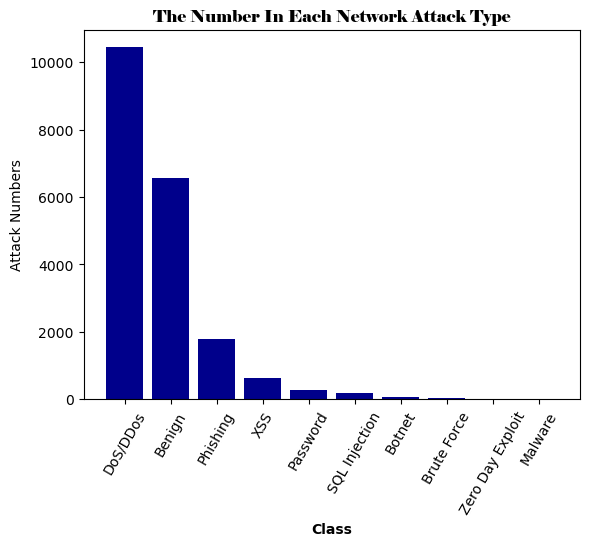

<Figure size 100000x12000 with 0 Axes>

In [14]:
plt.bar(attack_table.index, attack_table['Attack_Class'], color='darkblue')
plt.xlabel("Class", fontweight="bold")
plt.ylabel("Attack Numbers")
plt.title("The Number In Each Network Attack Type", fontfamily="elephant", 
          fontweight="bold")
plt.xticks(rotation=60, fontsize=10)
plt.figure(figsize=(1000, 120))
plt.show()

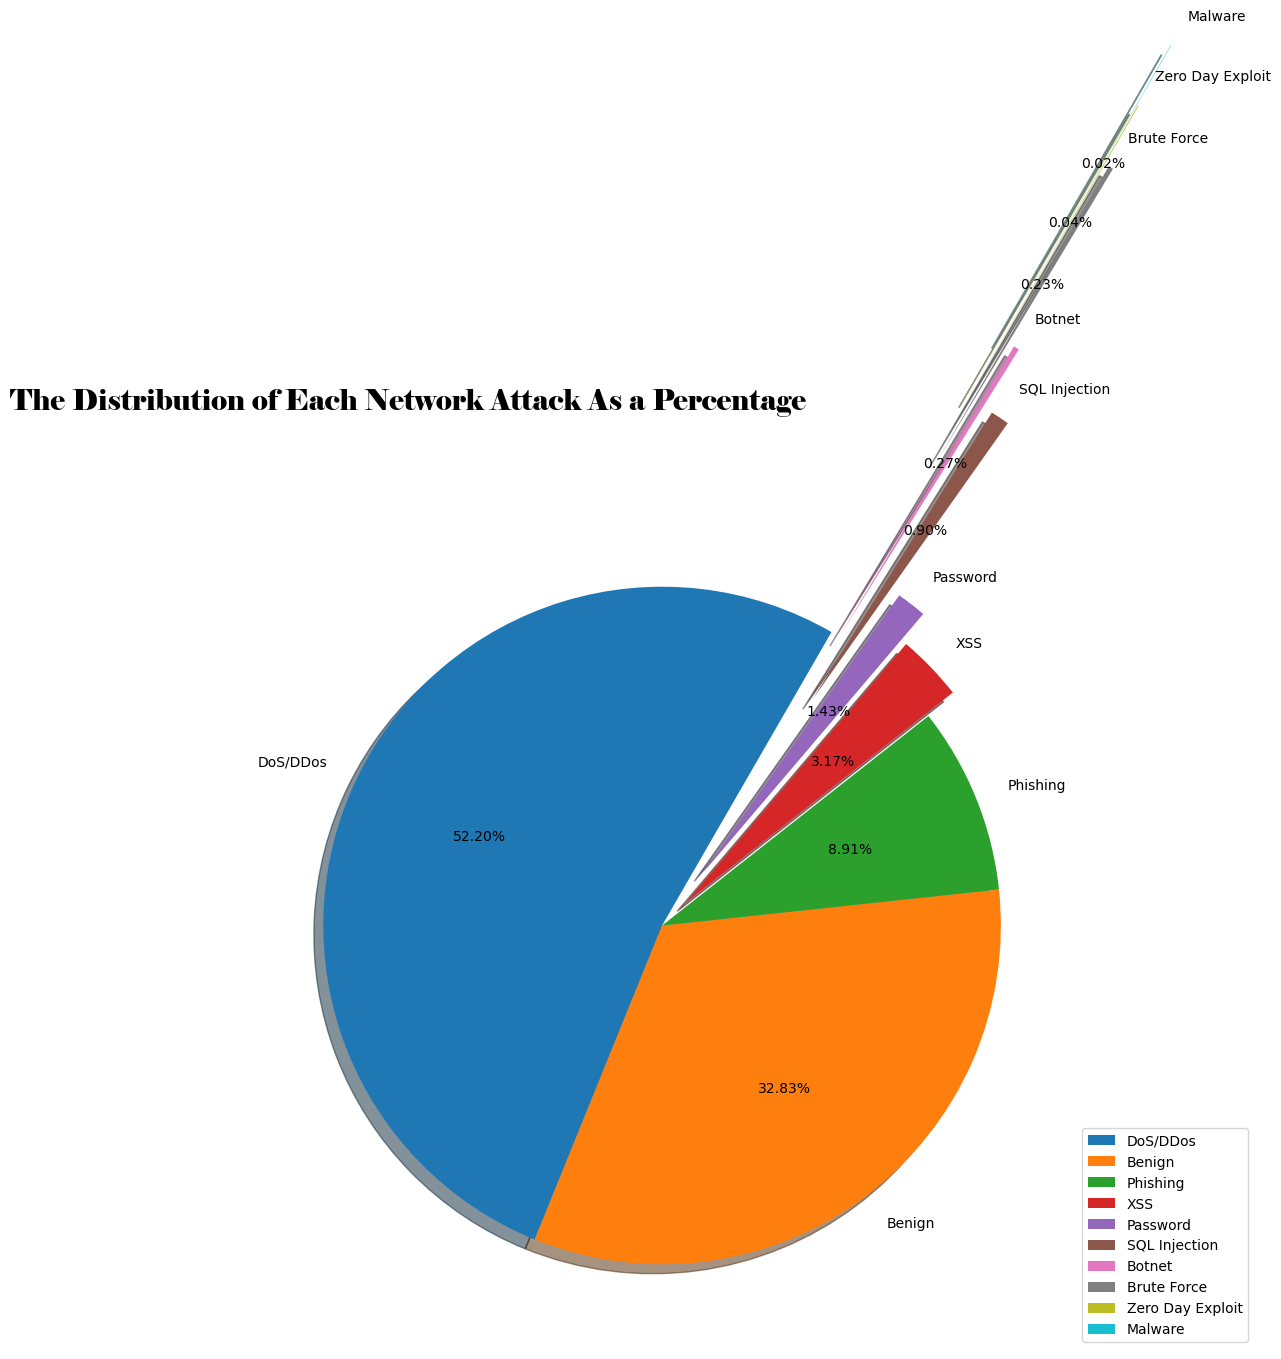

In [15]:
plt.figure(figsize=(11, 11))
explode=(0, 0, 0, 0.1, 0.2, 0.8, 1.0, 1.6, 1.8, 2.0)
plt.pie(attack_table['Frequency'], labels=attack_table.index,
        autopct="%1.2f%%", explode=explode, shadow=True, radius = 1, startangle=60)
plt.title("The Distribution of Each Network Attack As a Percentage", fontsize = 20, 
          fontweight="bold", fontfamily="elephant",  
          x = 0.2, y = 1.1)
plt.legend(loc= 'lower right', bbox_to_anchor=(0, 0, 1.2, 0.1))
plt.show() 


## Step 2 Data Preprocessing ##

### StandardScaler/LabelEncoder 
In addition to perform these inevitable skills associated with data analysis and visualization, the process so-called `data preprocessing` should not be forgotten completely. While taking a look at the framework of the table, especially its data type and column numbers, it may be noticed that not all columns are of type either integer or float, and a total of 45 features without the column `Attack_Class` are taken into account. Therefore, a useful technique should be considered rigorously so that columns that are suppposedly `non-numeric` must be adjusted into `numeric` for selecting these columns that are of great importance.

To accomplish the description above, two preprocessing techniques named `StandardScaler` and `LabelEncoder` appear in an urgent manner in that the data in each cell can be normalized effectively. `StandardScaler` is one of the most common approaches related to the equation $ z =\frac{x-\mu}{s}$, where $\mu$ represents the mean of each column that is of numeric types and $s$ the standard deviation used to modify the interval of mean. Meanwhile, the main purpose `StandardScaler` should be applied into each feature belonging to numeric is to standardize each feature by removing the mean and scaling to the unit variance.

`LabelEncoder` is another enigmatic method to be able to standardize features that are of type object, especially those that are categorical. More specifically, if one column in a dataset were to be parititoned into several groups, then the member in each group would be recorded as a number ranging between `0` to  `n_classes - 1`. After all these shortcuts are done promptly, an efficient feature selection procedure named `RandomForestClassifier (RFC)` can be chosen, and it will be discussed and investigated thoroughly later.        

In [16]:
# In this specific example, the dataset in each group can be identified with respect to each number:
# 0: NF-BOT-IOT-v2
# 1: NF-CSE-CIC-IDS2-18-v2
# 2: NF-ToN-IoT-v2
# 3: NF-UNSW-NB15-v2

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

scaler = StandardScaler()
scaler_columns_names = network.select_dtypes(include=['float64', 'int64']).columns
scaler_columns_satisfied = scaler.fit_transform(network.select_dtypes(include=['float64', 'int64']))
numeric_model = pd.DataFrame(scaler_columns_satisfied, columns=scaler_columns_names)

encoder = LabelEncoder()
encoder_column_names = network.select_dtypes(include=['object']).copy()
encoder_columns_satisfied = encoder_column_names.apply(encoder.fit_transform)
encoder_columns_satisfied_without_labels = encoder_columns_satisfied.drop(['Attack_Class'], axis=1)
labels_referenced = network[['Attack_Class']].copy()

train_X = pd.concat([numeric_model, encoder_columns_satisfied_without_labels], axis=1)
train_y = labels_referenced
train_X

L4_SRC_PORT  L4_DST_PORT  PROTOCOL  L7_PROTO  IN_BYTES   IN_PKTS  \
0         1.348590    -0.303891 -0.720799 -0.585352 -0.023987 -0.030564   
1        -1.607546    -0.303891 -0.720799 -0.585352 -0.033457 -0.037947   
2         0.077127    -0.213373 -0.720799 -0.674204 -0.049419 -0.045330   
3         0.338048     0.546654 -0.720799 -0.674204 -0.049419 -0.045330   
4         0.529418    -0.209323 -0.720799 -0.674204 -0.049419 -0.045330   
...            ...          ...       ...       ...       ...       ...   
19995    -0.619188    -0.303891 -0.720799 -0.585352 -0.023987 -0.030564   
19996     0.141172    -0.303891 -0.720799 -0.585352 -0.033457 -0.037947   
19997    -1.609780     0.007787 -0.720799 -0.674204  0.081125  0.043267   
19998    -0.226362    -0.269700 -0.720799  0.480870 -0.030210 -0.008414   
19999    -0.617116    -0.303891 -0.720799 -0.585352  0.054475  0.035884   

       OUT_BYTES  OUT_PKTS  TCP_FLAGS  CLIENT_TCP_FLAGS  SERVER_TCP_FLAGS  \
0      -0.060597 -0.127007  -0.382943         -0.347964         -0.532931   
1      -0.059585 -0.095589  -0.045294         -0.347964          0.589679   
2      -0.059585 -0.095589  -0.045294         -0.347964          0.589679   
3      -0.059585 -0.095589  -0.045294         -0.347964          0.589679   
4      -0.059585 -0.095589  -0.045294         -0.347964          0.589679   
...          ...       ...        ...               ...               ...   
19995  -0.060597 -0.127007  -0.382943         -0.347964         -0.532931   
19996  -0.060597 -0.127007  -0.382943         -0.347964         -0.532931   
19997  -0.006400  0.187168   3.348076          3.310665          1.150984   
19998  -0.054932 -0.001337  -0.095941         -0.078204          0.533548   
19999   0.196555  0.438507   0.039118          0.073537          0.982592   

       FLOW_DURATION_MILLISECONDS  DURATION_IN  DURATION_OUT   MIN_TTL  \
0                        0.915690     2.041652     -0.134181  0.258411   
1                        0.916347    -0.122937     -0.134181  0.258411   
2                       -1.091577    -0.812500     -0.134181 -1.362735   
3                       -1.091577    -0.812500     -0.134181 -1.362735   
4                       -1.091577    -0.812500     -0.134181 -1.362735   
...                           ...          ...           ...       ...   
19995                    0.915887     1.399278     -0.134181  0.258411   
19996                    0.916004     1.018724     -0.134181  0.258411   
19997                   -1.091577    -0.812500     -0.134181  1.195635   
19998                    0.916449    -0.431946      1.896434  0.258411   
19999                   -1.091577    -0.812500     -0.134181 -0.577492   

        MAX_TTL  LONGEST_FLOW_PKT  SHORTEST_FLOW_PKT  MIN_IP_PKT_LEN  \
0      0.257101         -0.295590           1.684167       -0.865625   
1      0.257101         -0.295590          -0.502760        0.591653   
2     -1.362864         -0.521754          -0.502760        0.591653   
3     -1.362864         -0.521754          -0.502760        0.591653   
4     -1.362864         -0.521754          -0.502760        0.591653   
...         ...               ...                ...             ...   
19995  0.257101         -0.295590           1.684167       -0.865625   
19996  0.257101         -0.295590           1.684167       -0.865625   
19997  1.193643          2.246400          -0.502760        0.591653   
19998  0.257101         -0.484060          -0.240329        1.028836   
19999 -0.552881          2.908401          -0.240329        1.028836   

       MAX_IP_PKT_LEN  SRC_TO_DST_SECOND_BYTES  DST_TO_SRC_SECOND_BYTES  \
0           -0.295590                -0.009163                -0.009216   
1           -0.295590                -0.009163                -0.009216   
2           -0.521754                -0.009163                -0.009216   
3           -0.521754                -0.009163                -0.009216   
4           -0.521754                -0.009163      

 ### Random Forest Classifier (RFC) ###
 `RandomForestClassifier` is one of feature selection techniques in assisting the process of choosing features that are relatively of great importance. To comprehend how this classifier functions, each feature in the data can be initially fitted into the import function of RFC so that the importance score of each feature in this dataset can be observed. Those with high importance scores are usually preferred due to the fact that they can be treated as crucial factors used to predict the network attack type corresponding to each row in the dataset by taking advantage of a unique method `sort_value` commonly used in Python programming language.        

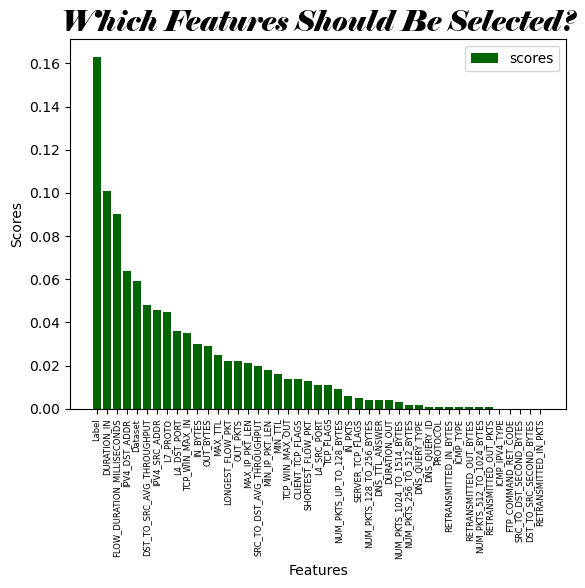

<Figure size 1100x400 with 0 Axes>

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_X, train_y)

scores = np.round(rfc.feature_importances_, 3)
scores_table = pd.DataFrame({'features': train_X.columns, 'scores': scores})
scores_table = scores_table.sort_values(by='scores', ascending=False).set_index('features')

plt.bar(scores_table.index, scores_table['scores'], color="darkgreen", label="scores")
plt.xlabel("Features")
plt.ylabel("Scores")
plt.title("Which Features Should Be Selected?", fontfamily="Elephant", fontsize=20,
          fontweight="bold", fontstyle="italic")
plt.xticks(rotation=90, fontsize=6)
plt.legend(loc='upper right')
plt.figure(figsize=(11, 4))
plt.show()

### Recursive Feature Elimination (RFE) ###
However, some people may not be satisfied with the outcome predicted above because only taking one of the methods of feature selection into account is not sufficient enough to prove the correctness of each feature. Therefore, to help them eliminate their doubt, the strategy used by data/machine learning scientists frequently called `Recursive Feature Elimination (RFE)` can be deployed either as a subsitute for RFC or a new means of re-examining the quality of the previous feature selection method. To better interpret the statement mentioned above, smaller sets of samples are considered recursively with the help of an external estimator that assigns weights to each feature selected in every round. Before starting the next round of the recursive process, the feature with the least importance must be deleted. The whole process continues until the number of feature columns over a designated interval is reached.

In [18]:
from sklearn.feature_selection import RFE
import itertools

#rfc = RandomForestClassifier()
rfe = RFE(rfc, n_features_to_select = 16)
rfe = rfe.fit(train_X, train_y)

feature_map = [(i,v) for i, v in itertools.zip_longest(rfe.get_support(), train_X.columns)]
selected_features = [v for (i, v) in feature_map if i==True]

selected_features

['L4_DST_PORT',
 'L7_PROTO',
 'IN_BYTES',
 'OUT_BYTES',
 'FLOW_DURATION_MILLISECONDS',
 'DURATION_IN',
 'LONGEST_FLOW_PKT',
 'MAX_IP_PKT_LEN',
 'SRC_TO_DST_AVG_THROUGHPUT',
 'DST_TO_SRC_AVG_THROUGHPUT',
 'TCP_WIN_MAX_IN',
 'TCP_WIN_MAX_OUT',
 'Label',
 'IPV4_SRC_ADDR',
 'IPV4_DST_ADDR',
 'Dataset']

### Group Division ###
Based on the description stated in the previous section, the desired number of features chosen is 15. Therefore, the original network data should be finalized into a dataframe consisting of features that are seriously assessed in two feature selection methods: `RFC` and `RFE`. On the other hand, this scenario is quite opportune for the final version of the network data to be divided into four groups in terms of the column `Dataset`, where the network attack data in each dataset group can be analyzed and trained in an efficacious manner. 

At the same time, I also need to choose the attack class in each dataset in order to predict the model as accurately as possible.

In [19]:
network_finalized = network[['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'L4_DST_PORT', 'L7_PROTO', 'IN_BYTES', 
                             'OUT_BYTES', 'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'LONGEST_FLOW_PKT',
                             'MAX_IP_PKT_LEN', 'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT', 
                             'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT', 'Label', 'Attack_Class', 'Dataset']] 
dataset_group_1 = network_finalized.groupby('Dataset').get_group('NF-BoT-IoT-v2')
dataset_group_2 = network_finalized.groupby('Dataset').get_group('NF-CSE-CIC-IDS2018-v2')
dataset_group_3 = network_finalized.groupby('Dataset').get_group('NF-ToN-IoT-v2')
dataset_group_4 = network_finalized.groupby('Dataset').get_group('NF-UNSW-NB15-v2')
# At the same time, I need to extract the attack class for each dataset.
attack_group_1 = dataset_group_1['Attack_Class']
attack_group_2 = dataset_group_2['Attack_Class']
attack_group_3 = dataset_group_3['Attack_Class']
attack_group_4 = dataset_group_4['Attack_Class']

dataset_group_1 = dataset_group_1.drop(['Attack_Class', 'Dataset'], axis=1)
dataset_group_2 = dataset_group_2.drop(['Attack_Class', 'Dataset'], axis=1)
dataset_group_3 = dataset_group_3.drop(['Attack_Class', 'Dataset'], axis=1)
dataset_group_4 = dataset_group_4.drop(['Attack_Class', 'Dataset'], axis=1)


However, before training and testing the model, it is necessary to convert the IP Address that is of type object into an integer type so that the dataset can better be fitted in each model. 

In [20]:
def convert_IPV4_to_num(obj):
    partitions = obj.split('.')
    l = [np.int64(x) for x in partitions]
    return l[0] * np.power(256, 3) + l[1] * np.power(256, 2) + l[2] * np.power(256, 1) + l[3] * np.power(256, 0) 

In [21]:
dataset_group_1['IPV4_SRC_ADDR'] = dataset_group_1['IPV4_SRC_ADDR'].apply(convert_IPV4_to_num)
dataset_group_2['IPV4_SRC_ADDR'] = dataset_group_2['IPV4_SRC_ADDR'].apply(convert_IPV4_to_num)
dataset_group_3['IPV4_SRC_ADDR'] = dataset_group_3['IPV4_SRC_ADDR'].apply(convert_IPV4_to_num)
dataset_group_4['IPV4_SRC_ADDR'] = dataset_group_4['IPV4_SRC_ADDR'].apply(convert_IPV4_to_num)

dataset_group_1['IPV4_DST_ADDR'] = dataset_group_1['IPV4_DST_ADDR'].apply(convert_IPV4_to_num)
dataset_group_2['IPV4_DST_ADDR'] = dataset_group_2['IPV4_DST_ADDR'].apply(convert_IPV4_to_num)
dataset_group_3['IPV4_DST_ADDR'] = dataset_group_3['IPV4_DST_ADDR'].apply(convert_IPV4_to_num)
dataset_group_4['IPV4_DST_ADDR'] = dataset_group_4['IPV4_DST_ADDR'].apply(convert_IPV4_to_num)

In [22]:
dataset_group_1

IPV4_SRC_ADDR  IPV4_DST_ADDR  L4_DST_PORT  L7_PROTO  IN_BYTES  \
0         3232261268     3232261127           80       7.0       420   
1         3232261268     3232261125           80       7.0       280   
8         3232261267     3232261125           80       7.0       280   
13        3232261267     3232261125           80       7.0       420   
15        3232261269     3232261123           80       7.0       280   
...              ...            ...          ...       ...       ...   
19986     3232261267     3232261125           80       7.0       420   
19988     3232261269     3232261127           80       7.0       280   
19993     3232261268     3232261125           80     188.0        84   
19995     3232261268     3232261125           80       7.0       420   
19996     3232261267     3232261125           80       7.0       280   

       OUT_BYTES  FLOW_DURATION_MILLISECONDS  DURATION_IN  LONGEST_FLOW_PKT  \
0              0                     4293092         1875               140   
1             40                     4294499          453               140   
8             40                     4293420         1547               140   
13             0                     4293327         1640               140   
15             0                     4293342         1625               140   
...          ...                         ...          ...               ...   
19986          0                     4292779         2188               140   
19988          0                     4293967         1000               140   
19993          0                     4293594         1373                28   
19995          0                     4293514         1453               140   
19996          0                     4293764         1203               140   

       MAX_IP_PKT_LEN  SRC_TO_DST_AVG_THROUGHPUT  DST_TO_SRC_AVG_THROUGHPUT  \
0                 140                    1120000                          0   
1                 140                          0                     320000   
8                 140                    1120000                     320000   
13                140                    1120000                          0   
15                140                    1120000                          0   
...               ...                        ...                        ...   
19986             140                    1120000                          0   
19988             140                    1120000                          0   
19993              28                     224000                          0   
19995             140                          0                          0   
19996             140                    1120000                          0   

       TCP_WIN_MAX_IN  TCP_WIN_MAX_OUT  Label  
0                 512                0      1  
1                 512                0      1  
8                 512                0      1  
13                512                0      1  
15                512                0      1  
...               ...              ...    ...  
19986             512                0      1  
19988             512                0      1  
19993               0                0      1  
19995             512                0      1  
19996             512                0      1  

[9987 rows x 15 columns]

In [23]:
dataset_group_2

IPV4_SRC_ADDR  IPV4_DST_ADDR  L4_DST_PORT  L7_PROTO  IN_BYTES  \
5         2887729717     1298005682          443    91.000       152   
10        2948848415     2887729173         3389     0.000      1969   
11        3740661038     2887729261           23    77.000        40   
12        2887729776     2887712770           53     0.000        70   
14        2887730446     2887712770           53     5.126        71   
...              ...            ...          ...       ...       ...   
19979     2887729187     2887712770           53     0.000        70   
19990     2887729189     2887712770           53     5.124        57   
19991     2887729671     2887712770           53     5.126        70   
19992     2887729156     2887712770           53     5.240        75   
19997     3586844367     2887730006         3389     0.000      1974   

       OUT_BYTES  FLOW_DURATION_MILLISECONDS  DURATION_IN  LONGEST_FLOW_PKT  \
5            120                           0            0                52   
10          1773                           0            0              1189   
11             0                           0            0                40   
12           116                           0            0               116   
14            87                           0            0                87   
...          ...                         ...          ...               ...   
19979        125                           0            0               125   
19990        278                           0            0               278   
19991        134                           0            0               134   
19992        156                           0            0               156   
19997       2143                           0            0              1219   

       MAX_IP_PKT_LEN  SRC_TO_DST_AVG_THROUGHPUT  DST_TO_SRC_AVG_THROUGHPUT  \
5                  52                    1216000                     960000   
10               1189                   15752000                   14184000   
11                 40                     320000                          0   
12                116                     560000                     928000   
14                 87                    1136000                    1040000   
...               ...                        ...                        ...   
19979             125                    1120000                    1000000   
19990             278                     456000                    2224000   
19991             134                     560000                    1072000   
19992             156                     600000                    1248000   
19997            1219                   15792000                   17144000   

       TCP_WIN_MAX_IN  TCP_WIN_MAX_OUT  Label  
5                8192                0      0  
10              64240            64000      0  
11              59190                0      0  
12                  0                0      0  
14                  0                0      0  
...               ...              ...    ...  
19979               0                0      0  
19990               0                0      0  
19991               0                0      0  
19992               0                0      0  
19997            8192            64000      0  

[5021 rows x 15 columns]

In [24]:
dataset_group_3

IPV4_SRC_ADDR  IPV4_DST_ADDR  L4_DST_PORT  L7_PROTO  IN_BYTES  \
2         3232235807     3232235855         1041       0.0        44   
3         3232235810     3232235855         9110       0.0        44   
4         3232235806     3232235928         1084       0.0        44   
6         3232235808     3232235945         9012       0.0       232   
7         3232235807     3232235956           22      92.0        84   
...              ...            ...          ...       ...       ...   
19981     3232235806     3232235822        38043       0.0        48   
19987     3232235807     3232235966          911       0.0        44   
19989     3232235815     3232235966           80       7.0      3034   
19994     3232235807     3232235928         5811       0.0        44   
19998     3232235814     3232235960          443      91.0       328   

       OUT_BYTES  FLOW_DURATION_MILLISECONDS  DURATION_IN  LONGEST_FLOW_PKT  \
2             40                           0            0                44   
3             40                           0            0                44   
4             40                           0            0                44   
6            132                           0            0                92   
7             88                     4294952           15                44   
...          ...                         ...          ...               ...   
19981          0                           0            0                48   
19987         40                           0            0                44   
19989       1554                           0            0              1500   
19994          0                           0            0                44   
19998        224                     4294717          250                60   

       MAX_IP_PKT_LEN  SRC_TO_DST_AVG_THROUGHPUT  DST_TO_SRC_AVG_THROUGHPUT  \
2                  44                     352000                     320000   
3                  44                     352000                     320000   
4                  44                     352000                     320000   
6                  92                    1856000                    1056000   
7                  44                      40000                      40000   
...               ...                        ...                        ...   
19981              48                     384000                          0   
19987              44                     352000                     320000   
19989            1500                   24272000                   12432000   
19994              44                     352000                          0   
19998              60                       8000                          0   

       TCP_WIN_MAX_IN  TCP_WIN_MAX_OUT  Label  
2                1024                0      0  
3                1024                0      0  
4                1024                0      0  
6               29200            65535      0  
7                1024            29200      1  
...               ...              ...    ...  
19981            4096                0      1  
19987            1024                0      0  
19989           29200            28960      1  
19994            1024                0      0  
19998           29200            28960      1  

[4410 rows x 15 columns]

In [25]:
dataset_group_4

IPV4_SRC_ADDR  IPV4_DST_ADDR  L4_DST_PORT  L7_PROTO  IN_BYTES  \
61        1000734728     2511044099         6881       0.0      1540   
99        1000734724     2511044105           53       0.0       146   
109       1000734729     2511044100        47777       0.0       536   
131       2939006979     2511044108          179       0.0     25066   
185       1000734728     2511044100           53       0.0       146   
...              ...            ...          ...       ...       ...   
19832     1000734726     2511044104           21       1.0      1251   
19869     1000734722     2511044105           21       1.0      1817   
19901     1000734726     2511044099          111       0.0       568   
19966     1000734727     2511044102        16735       0.0      3614   
19999     1000734727     2511044105           80       7.0      1580   

       OUT_BYTES  FLOW_DURATION_MILLISECONDS  DURATION_IN  LONGEST_FLOW_PKT  \
61          1644                           0            0               329   
99           178                           0            0                89   
109          304                           0            0               152   
131          624                     4294952           15              1500   
185          178                           0            0                89   
...          ...                         ...          ...               ...   
19832       1752                           0            0               106   
19869       2512                           0            0               106   
19901        304                           0            0               142   
19966      45396                           0            0              1352   
19999      10168                           0            0              1500   

       MAX_IP_PKT_LEN  SRC_TO_DST_AVG_THROUGHPUT  DST_TO_SRC_AVG_THROUGHPUT  \
61                329                   12320000                   13152000   
99                 89                    1168000                    1424000   
109               152                    4288000                    2432000   
131              1500                   12528000                     312000   
185                89                    1168000                    1424000   
...               ...                        ...                        ...   
19832             106                    8552000                    9520000   
19869             106                   10616000                   12192000   
19901             142                    4544000                    2432000   
19966            1352                   28912000                  363168000   
19999            1500                   12640000                   81344000   

       TCP_WIN_MAX_IN  TCP_WIN_MAX_OUT  Label  
61              10136            10136      0  
99                  0                0      0  
109                 0                0      0  
131             16383            16383      1  
185                 0                0      0  
...               ...              ...    ...  
19832           15928            14480      0  
19869           20272            17376      0  
19901               0                0      0  
19966           39096            14480      0  
19999           11584             8688      0  

[582 rows x 15 columns]

## Step 3 Machine Learning Model Training ##
We are currently diving into the process of training the machine learning model. The following procedures with regard to the model training can be explained as follows:
- (1) split the data into both the train set and the test set
- (2) fit each model 
     - Decision Tree Classifier (DT)
     - Naive Bayes Classifier (NB)
     - K-Nearest Neighbor Classifier (KNN)
     - Support Vector Machine (SVM)
- (3) evaluate the performance of each machine learning model 
     - cross-validation 
     - the model accuracy
     - confusion matrix
     - classification report

In [26]:
from sklearn.model_selection import train_test_split
train_X_group1, test_X_group1, train_y_group1, test_y_group1 = train_test_split(dataset_group_1, attack_group_1, train_size = 0.8,
                                                                                test_size = 0.2)

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

DT1 = DecisionTreeClassifier()
DT1.fit(train_X_group1, train_y_group1)
NB1 = MultinomialNB()
NB1.fit(train_X_group1, train_y_group1)
KNN1 = KNeighborsClassifier()
KNN1.fit(train_X_group1, train_y_group1)
SVM1 = SVC()
SVM1.fit(train_X_group1, train_y_group1)

SVC()

In [28]:
network[network['Dataset']=='NF-BoT-IoT-v2']['Attack_Class'].value_counts()

DoS/DDos    9220
Phishing     725
Benign        42
Name: Attack_Class, dtype: int64

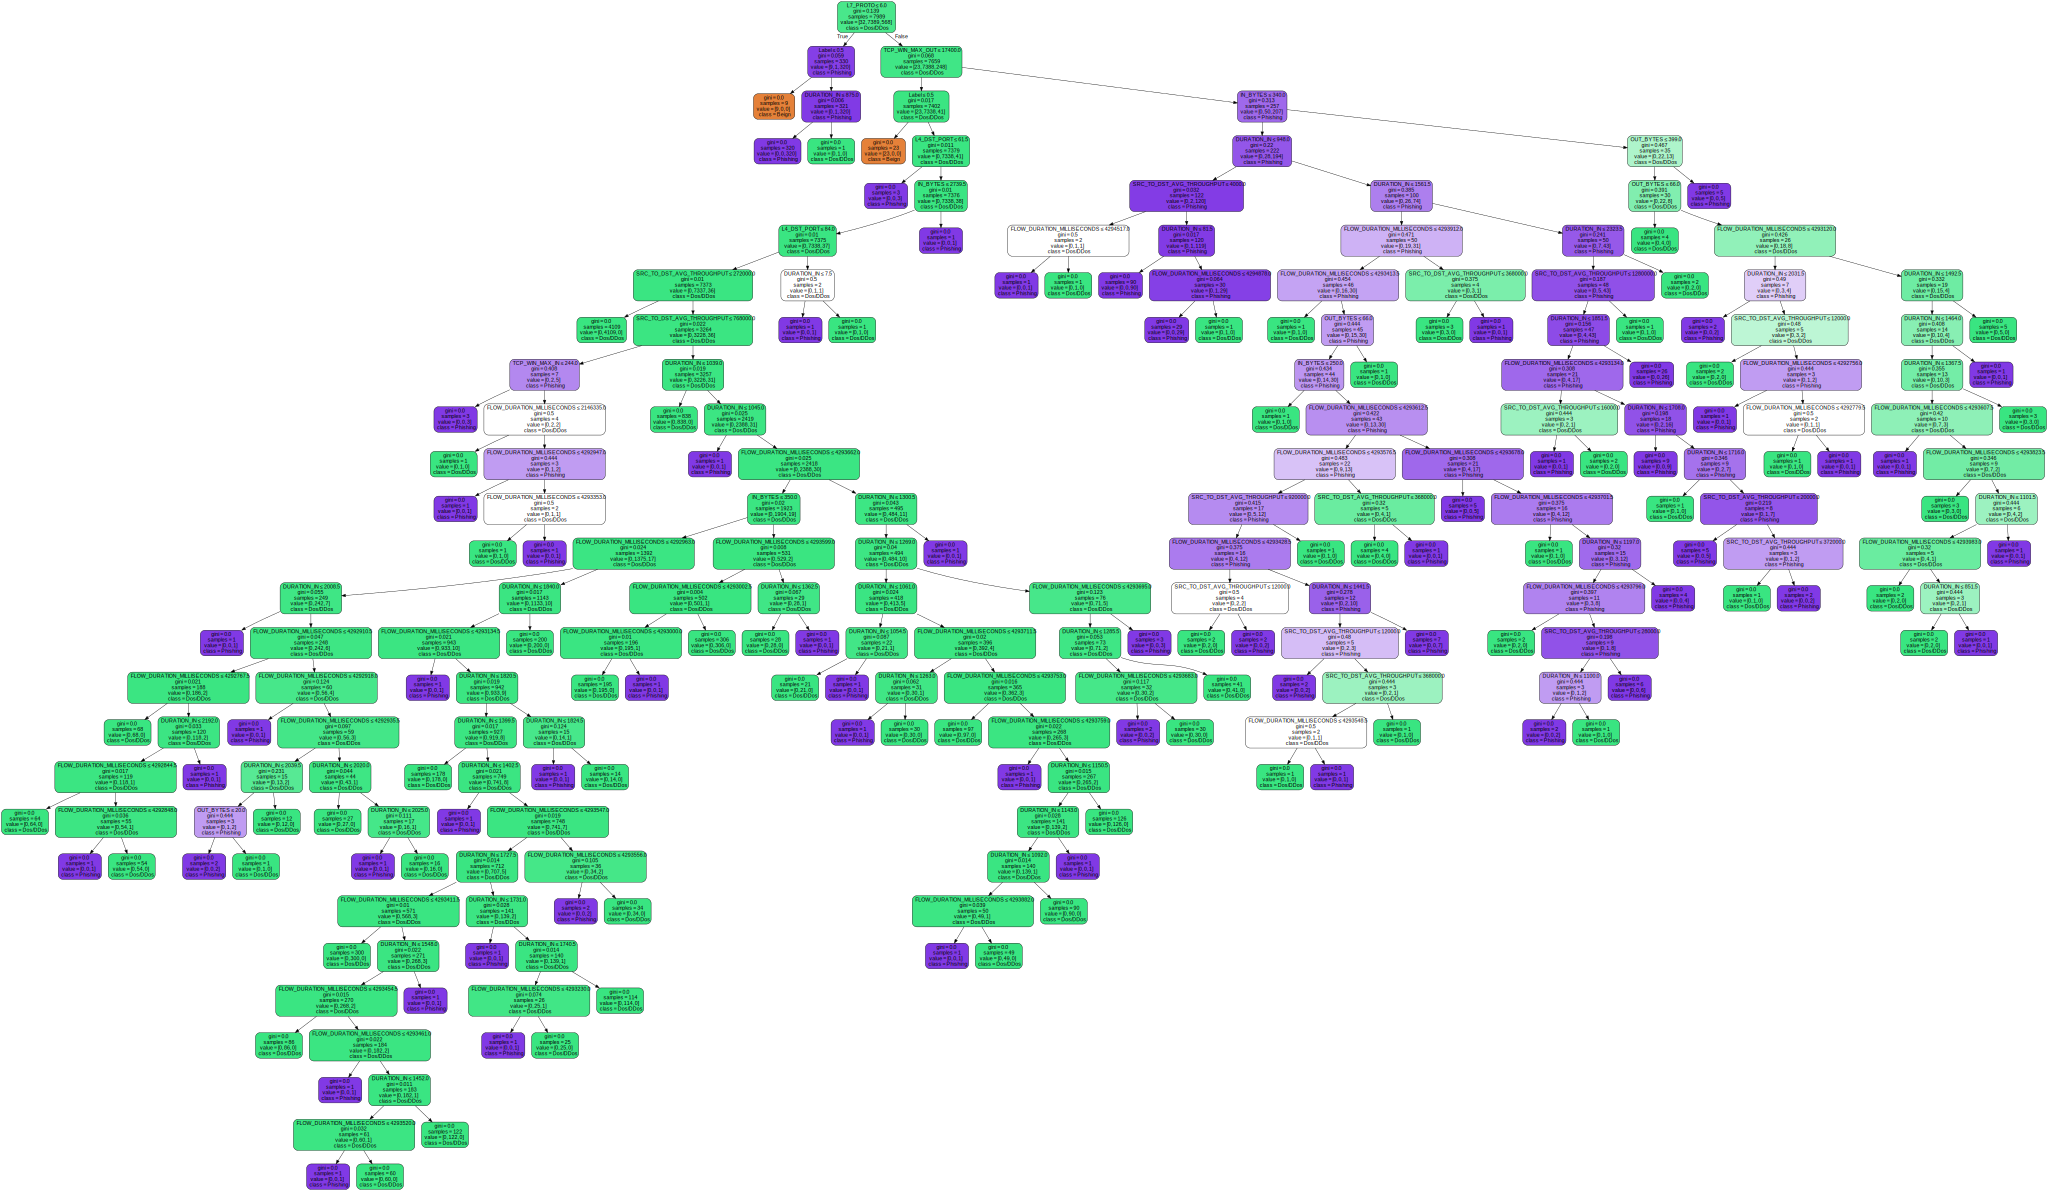

In [32]:
from sklearn.tree import export_graphviz
from graphviz import Source
import graphviz as g


dot_data_group1 = export_graphviz(DT1, out_file=None, feature_names = train_X_group1.columns, 
                           class_names=['Beign', 'Dos/DDos', 
                           'Phishing'], filled=True, rounded=True,
                           special_characters=True)
graph = g.Source(dot_data_group1)
graph


====================================NF-BoT-IoT-v2 Decision Tree Classifier: : Model Evaluation ====================================

The mean score in 10-Fold cross validation is: 
 0.9868571616776609

The accuracy of the model is: 
 1.0

The visualization of the confusion matrix can be displayed as below:



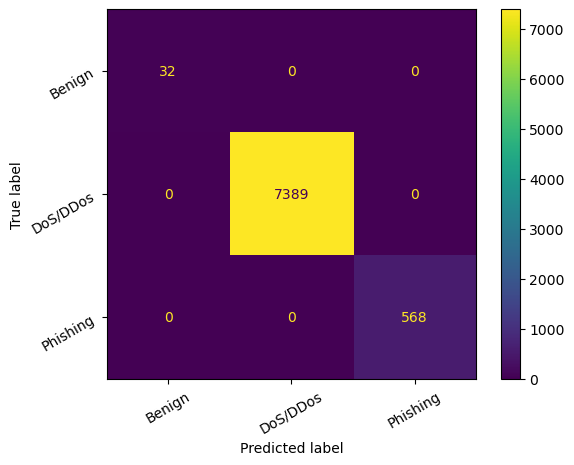


The heatmap for the classification table can be demonstrated as follows:


====================================NF-BoT-IoT-v2 Naive Bayes Classifier: : Model Evaluation ====================================

The mean score in 10-Fold cross validation is: 
 0.9121268440186825

The accuracy of the model is: 
 0.8952309425460008

The visualization of the confusion matrix can be displayed as below:



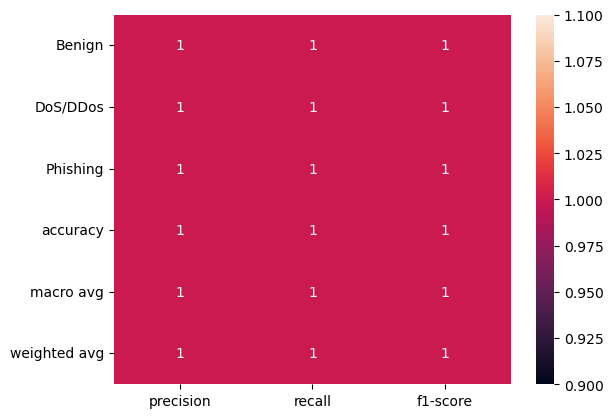

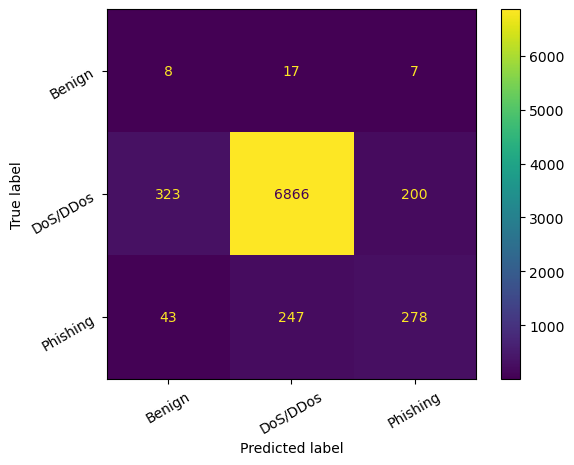


The heatmap for the classification table can be demonstrated as follows:


====================================NF-BoT-IoT-v2 K-Nearest Neighbor Classifier: : Model Evaluation ====================================

The mean score in 10-Fold cross validation is: 
 0.9863563790577821

The accuracy of the model is: 
 0.9889848541744899

The visualization of the confusion matrix can be displayed as below:



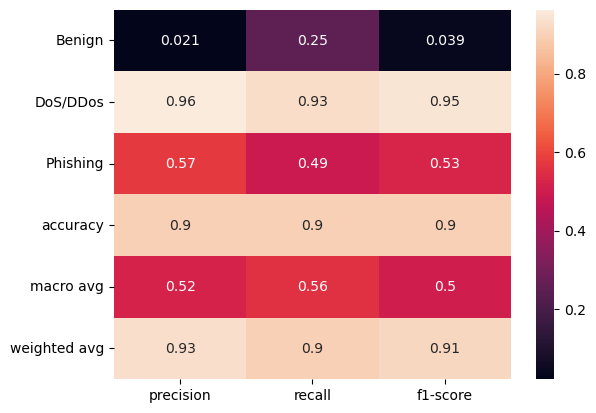

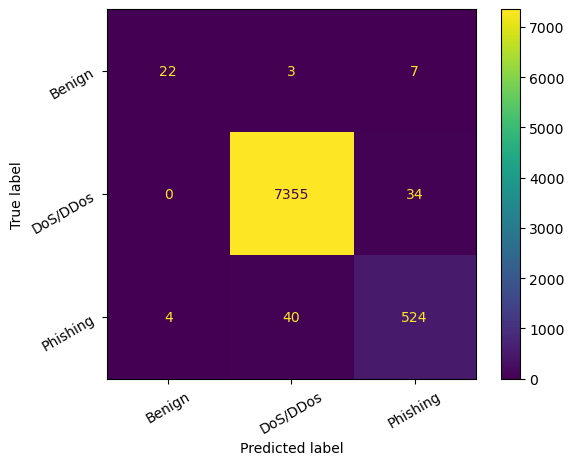


The heatmap for the classification table can be demonstrated as follows:


====================================NF-BoT-IoT-v2 SVM Classifier: : Model Evaluation ====================================

The mean score in 10-Fold cross validation is: 
 0.9248967224067679

The accuracy of the model is: 
 0.9248967330078859

The visualization of the confusion matrix can be displayed as below:



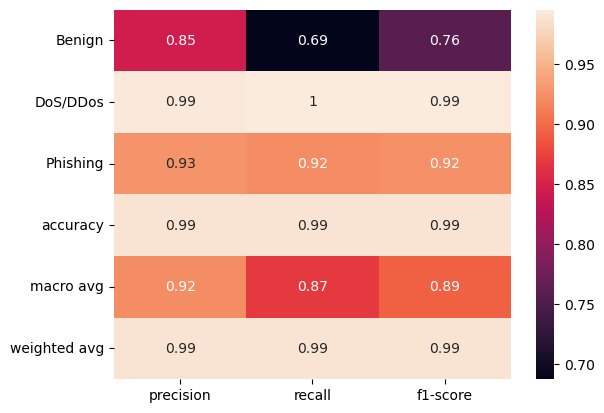

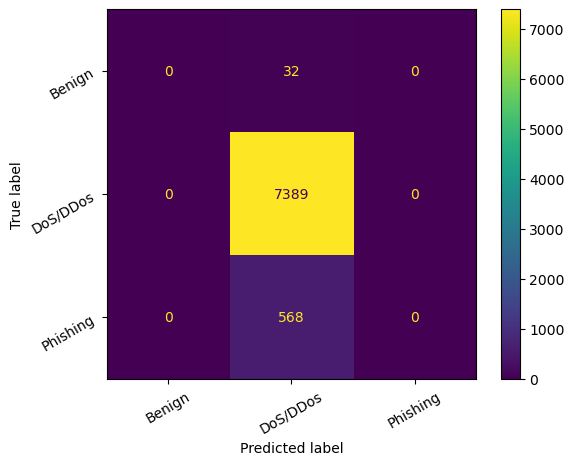


The heatmap for the classification table can be demonstrated as follows:



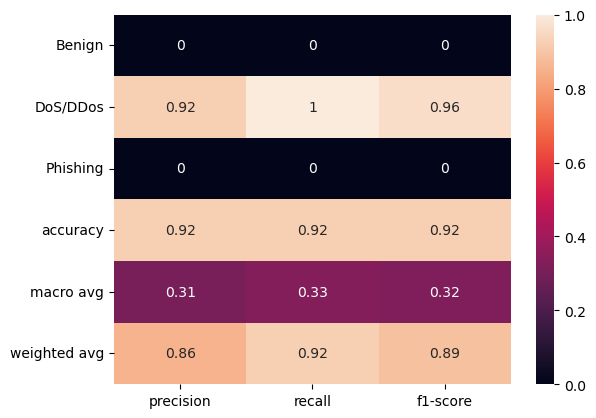

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

models1 = []
models1.append(("Decision Tree Classifier: ", DT1))
models1.append(("Naive Bayes Classifier: ", NB1))
models1.append(("K-Nearest Neighbor Classifier: ", KNN1))
models1.append(("SVM Classifier: ", SVM1))


group1_train_val_score = []
for i, v in models1:
    scores_group1_train = cross_val_score(v, train_X_group1, train_y_group1, cv=10)
    group1_train_val_score.append(scores_group1_train)
    accuracy_group1_train = accuracy_score(train_y_group1, v.predict(train_X_group1))
    confusion_matrix_group1_train = confusion_matrix(train_y_group1, v.predict(train_X_group1))
    classification_group1_train = classification_report(train_y_group1, v.predict(train_X_group1), output_dict=True)
    print()
    print("===================================={} {}: Model Evaluation ====================================".format("NF-BoT-IoT-v2", i))
    print()
    print("The mean score in 10-Fold cross validation is: \n", scores_group1_train.mean())
    print()
    print("The accuracy of the model is: \n", accuracy_group1_train)
    print()
    print("The visualization of the confusion matrix can be displayed as below:\n")
    cm_display_group1_train = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_group1_train, display_labels=['Benign', 'DoS/DDos', 'Phishing'])
    cm_display_group1_train.plot()
    plt.xticks(rotation=30)
    plt.yticks(rotation=30)
    plt.show()
    print()
    print("The heatmap for the classification table can be demonstrated as follows:")
    sns.heatmap(pd.DataFrame(classification_group1_train).iloc[:-1,:].T, annot=True)
    print()
    


====================================NF-BoT-IoT-v2 Decision Tree Classifier: : Model Evaluation ====================================

The mean score in 10-Fold cross validation is: 
 0.9899874371859297

The accuracy of the model is: 
 0.98998998998999

The visualization of the confusion matrix can be displayed as below:



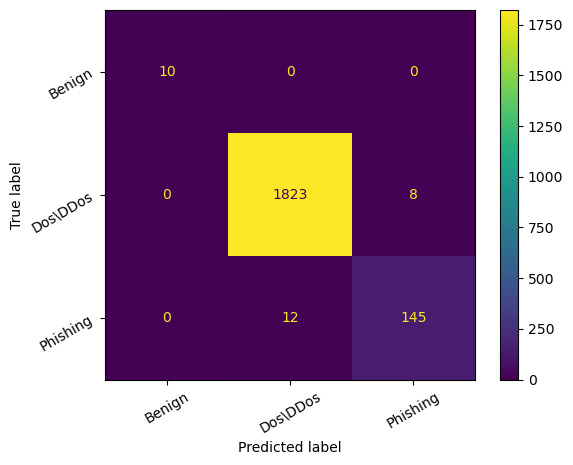


The heatmap for the classification report can be demonstrated as below:



====================================NF-BoT-IoT-v2 Naive Bayes Classifier: : Model Evaluation ====================================

The mean score in 10-Fold cross validation is: 
 0.9219145728643214

The accuracy of the model is: 
 0.8878878878878879

The visualization of the confusion matrix can be displayed as below:



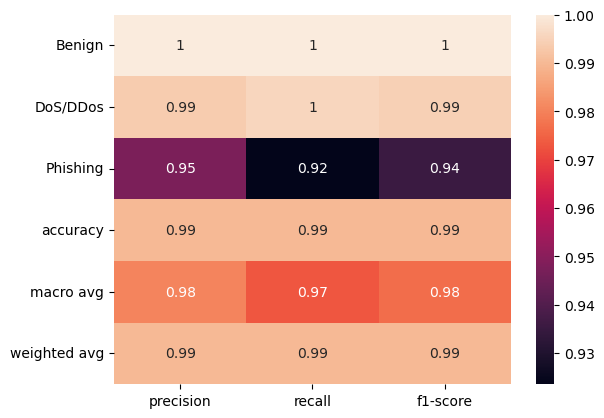

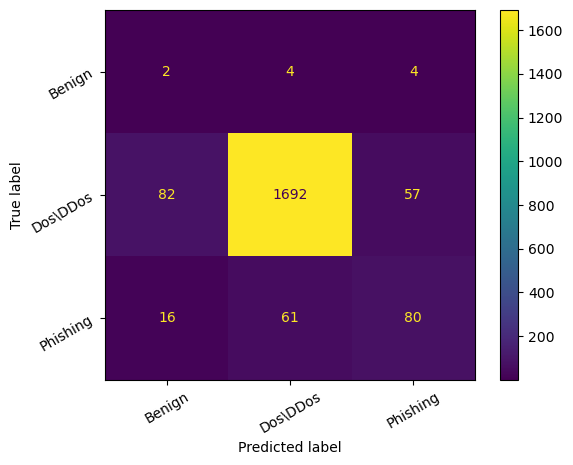


The heatmap for the classification report can be demonstrated as below:



====================================NF-BoT-IoT-v2 K-Nearest Neighbor Classifier: : Model Evaluation ====================================

The mean score in 10-Fold cross validation is: 
 0.9849798994974874

The accuracy of the model is: 
 0.988988988988989

The visualization of the confusion matrix can be displayed as below:



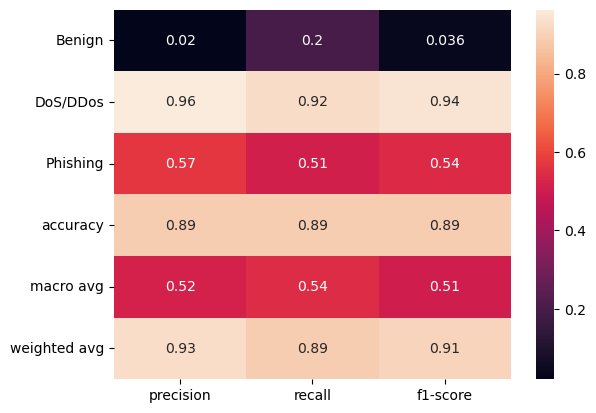

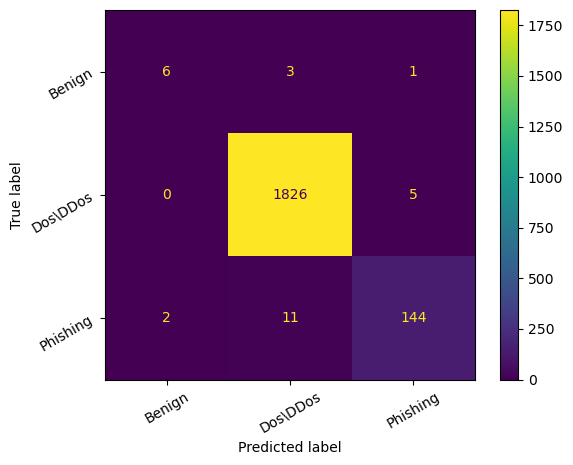


The heatmap for the classification report can be demonstrated as below:



====================================NF-BoT-IoT-v2 SVM Classifier: : Model Evaluation ====================================

The mean score in 10-Fold cross validation is: 
 0.9164195979899498

The accuracy of the model is: 
 0.9164164164164165

The visualization of the confusion matrix can be displayed as below:



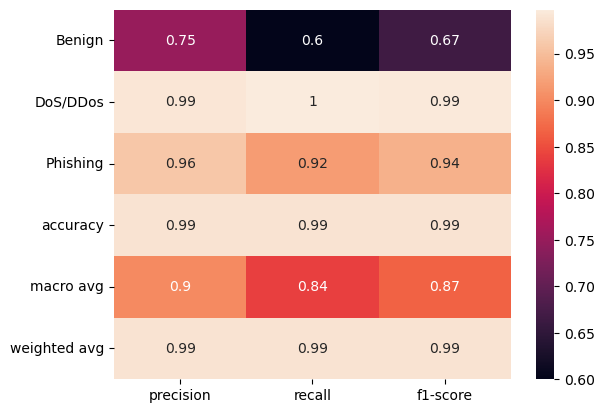

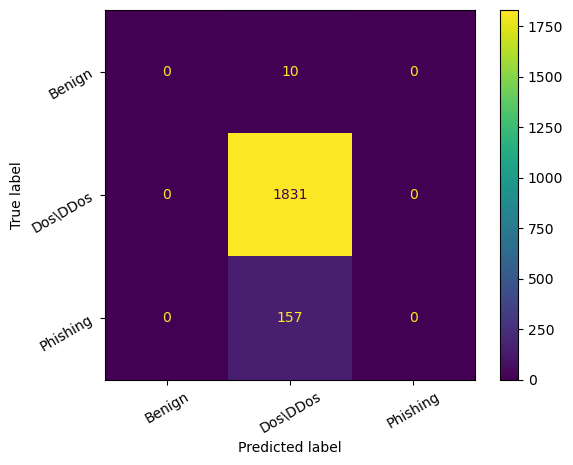


The heatmap for the classification report can be demonstrated as below:




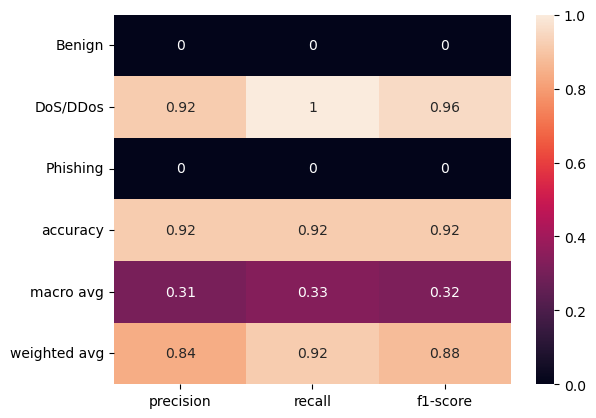

In [33]:
group1_test_val_score = []
for i, v in models1:
   scores_group1_test = cross_val_score(v, test_X_group1, test_y_group1, cv=10)
   group1_test_val_score.append(scores_group1_test)
   accuracy_group1_test = accuracy_score(test_y_group1, v.predict(test_X_group1))
   confusion_matrix_group1_test = confusion_matrix(test_y_group1, v.predict(test_X_group1))
   classification_group1_test = classification_report(test_y_group1, v.predict(test_X_group1), output_dict=True)
   print()
   print("===================================={} {}: Model Evaluation ====================================".format("NF-BoT-IoT-v2", i))
   print()
   print("The mean score in 10-Fold cross validation is: \n", scores_group1_test.mean())
   print()
   print("The accuracy of the model is: \n", accuracy_group1_test)
   print()
   print("The visualization of the confusion matrix can be displayed as below:\n")
   cm_display_group1_test = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_group1_test, display_labels=['Benign', 'Dos\DDos', 'Phishing'])
   cm_display_group1_test.plot()
   plt.xticks(rotation=30)
   plt.yticks(rotation=30)
   plt.show()
   print()
   print("The heatmap for the classification report can be demonstrated as below:\n")
   sns.heatmap(pd.DataFrame(classification_group1_test).iloc[:-1,:].T, annot=True)   
   print()

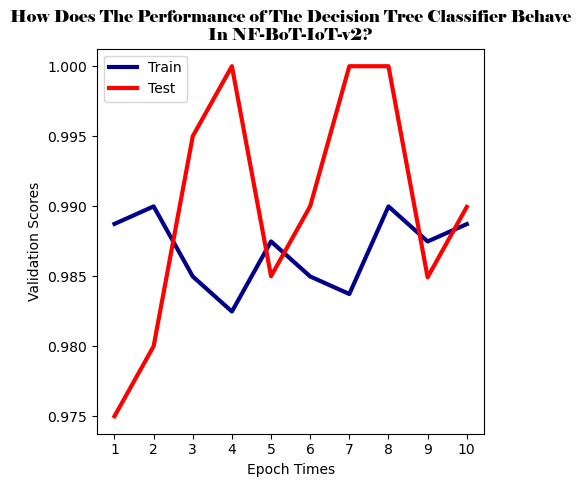

In [34]:
epoches_1_group1 = np.arange(1, 11, 1)
plt.figure(figsize=(5, 5))
plt.plot(epoches_1_group1, group1_train_val_score[0], label="Train", color="darkblue", linewidth=3.0, alpha=1.0)
plt.plot(epoches_1_group1, group1_test_val_score[0], label="Test", color="red", linewidth=3.0, alpha=1.0)
plt.title("How Does The Performance of The Decision Tree Classifier Behave" +
           "\n" + "In NF-BoT-IoT-v2?", fontfamily="Elephant", fontweight="bold")
plt.xlabel("Epoch Times")
plt.ylabel("Validation Scores")
plt.xticks(epoches_1_group1)
plt.legend()
plt.show()

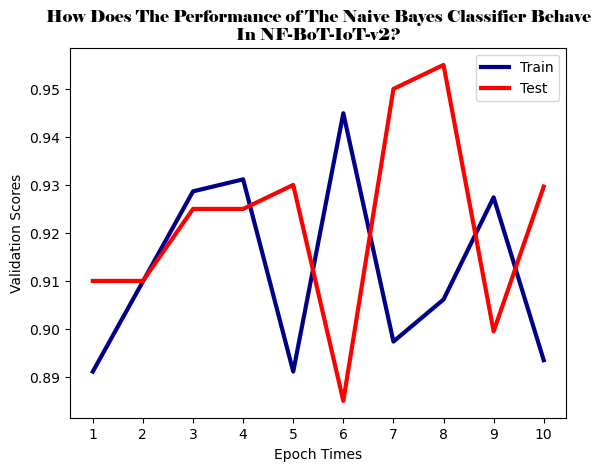

In [35]:
epoches_2_group1 = np.arange(1, 11, 1)
plt.plot(epoches_2_group1, group1_train_val_score[1], label="Train", color="darkblue", linewidth= 3.0,  alpha=1.0)
plt.plot(epoches_2_group1, group1_test_val_score[1], label="Test", color="red", linewidth = 3.0, alpha=1.0)
plt.title("How Does The Performance of The Naive Bayes Classifier Behave" +
          "\n" + "In NF-BoT-IoT-v2?", fontfamily="Elephant", fontweight="bold")
plt.xlabel("Epoch Times")
plt.ylabel("Validation Scores")
plt.xticks(epoches_2_group1)
plt.legend()
plt.show()


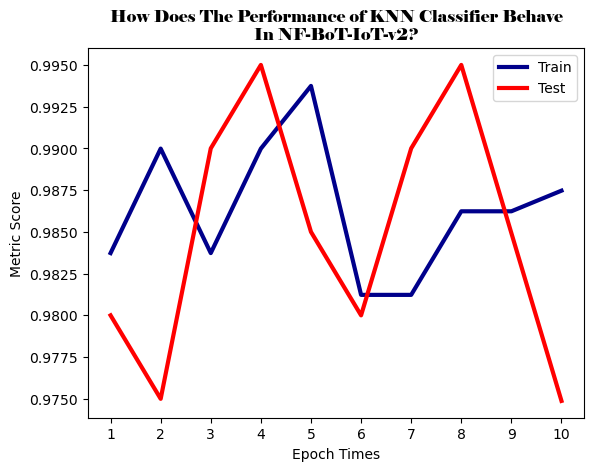

In [36]:
epoches_3_group1 = np.arange(1, 11, 1)
plt.plot(epoches_3_group1, group1_train_val_score[2], label="Train", color="darkblue", linewidth=3.0, alpha=1.0)
plt.plot(epoches_3_group1, group1_test_val_score[2], label="Test", color="red", linewidth=3.0, alpha=1.0)
plt.title("How Does The Performance of KNN Classifier Behave" + 
          "\n" + "In NF-BoT-IoT-v2?", fontfamily="Elephant", fontweight="bold")
plt.xlabel("Epoch Times")
plt.ylabel("Metric Score")
plt.xticks(epoches_3_group1)
plt.legend()
plt.show()

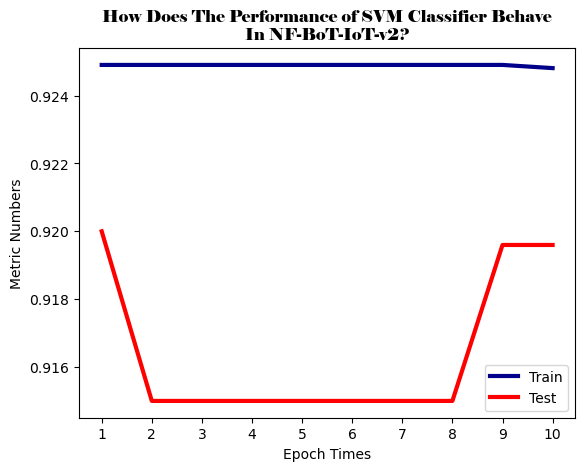

In [37]:
epoches_4_group1 = np.arange(1, 11, 1)
plt.plot(epoches_4_group1, group1_train_val_score[3], label="Train", color="darkblue", linewidth=3.0, alpha=1.0)
plt.plot(epoches_4_group1, group1_test_val_score[3], label="Test", color="red", linewidth=3.0, alpha=1.0)
plt.title("How Does The Performance of SVM Classifier Behave" +
          "\n" + "In NF-BoT-IoT-v2?", fontfamily="Elephant", fontweight="bold")
plt.xlabel("Epoch Times")
plt.ylabel("Metric Numbers")
plt.xticks(epoches_4_group1)
plt.legend()
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
train_X_group2, test_X_group2, train_y_group2, test_y_group2 = train_test_split(dataset_group_2, attack_group_2, train_size = 0.8,
                                                                                test_size = 0.2)

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

DT2 = DecisionTreeClassifier()
DT2.fit(train_X_group2, train_y_group2)
NB2 = MultinomialNB()
NB2.fit(train_X_group2, train_y_group2)
KNN2 = KNeighborsClassifier()
KNN2.fit(train_X_group2, train_y_group2)
SVM2 = SVC()
SVM2.fit(train_X_group2, train_y_group2)

SVC()

In [41]:
network_finalized[network_finalized['Dataset'] == "NF-CSE-CIC-IDS2018-v2"]['Attack_Class'].value_counts()

Benign         4365
DoS/DDos        511
Botnet           55
Brute Force      46
Phishing         44
Name: Attack_Class, dtype: int64

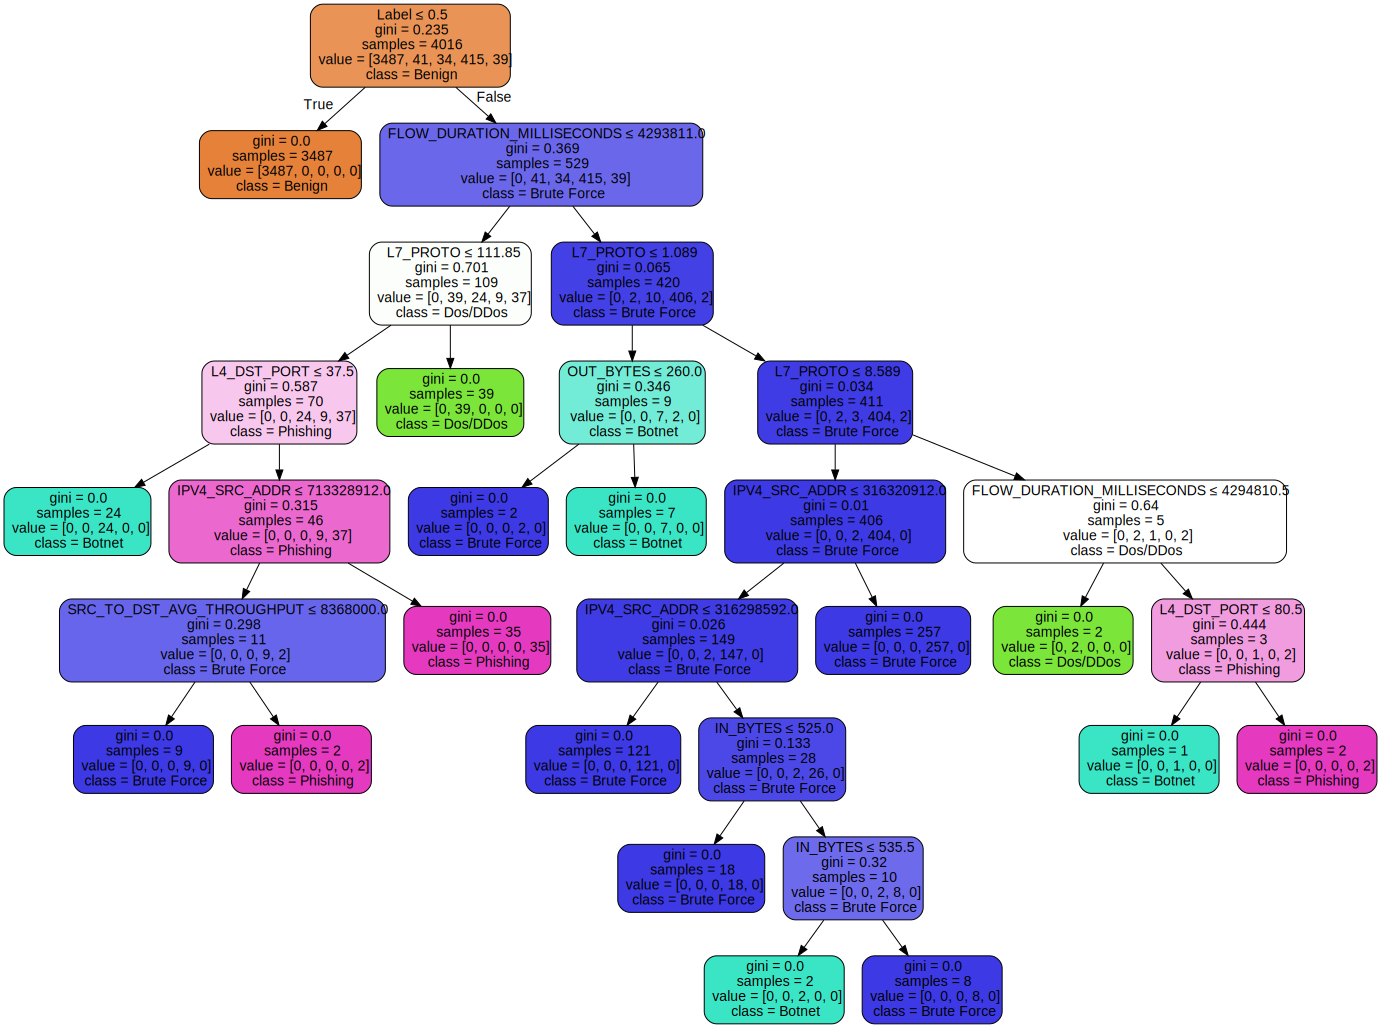

In [43]:
from sklearn.tree import export_graphviz
from graphviz import Source
import graphviz as g

dot_data_group2 = export_graphviz(DT2, out_file=None, feature_names=train_X_group2.columns,
                                  class_names=['Benign', 'Dos/DDos', 
                                'Botnet', 'Brute Force', 'Phishing'], filled=True,
                                rounded=True, special_characters=True)
graph_2 = g.Source(dot_data_group2)
graph_2


===============================NF-CSE-CIC-IDS2018-v2 Decision Tree Classifier: : Model Evaluation ===========================

The mean score in 10-Fold cross validation is: 
 0.9985056016674732

The accuracy of the model in the training set is: 
 1.0

The visualization of the confusion matrix can be displayed as follows: 



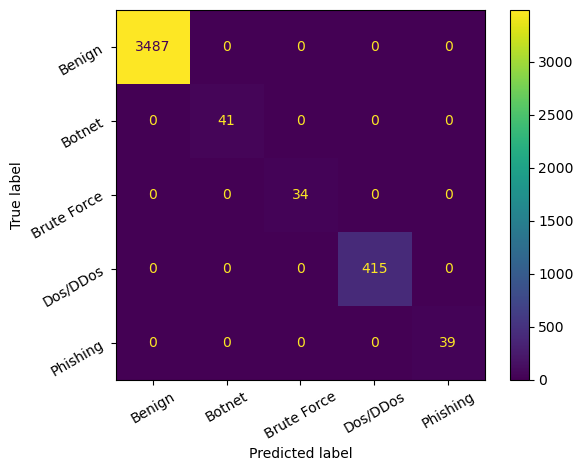


The heatmap for the classification table can be demonstrated as below: 



===============================NF-CSE-CIC-IDS2018-v2 Naive Bayes Classifier: : Model Evaluation ===========================

The mean score in 10-Fold cross validation is: 
 0.3344127244078857

The accuracy of the model in the training set is: 
 0.32843625498007967

The visualization of the confusion matrix can be displayed as follows: 



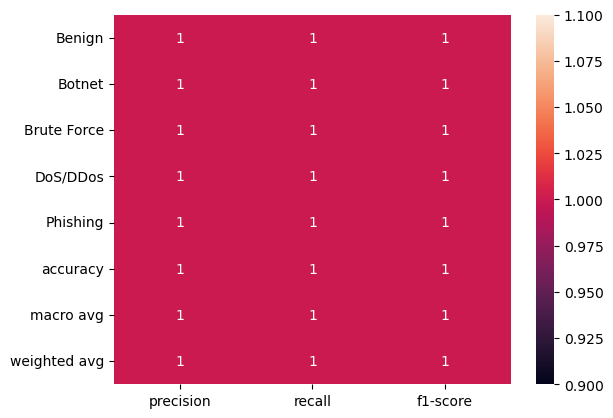

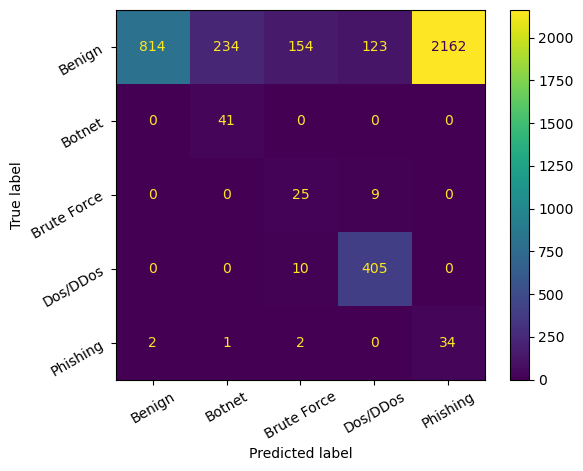


The heatmap for the classification table can be demonstrated as below: 



===============================NF-CSE-CIC-IDS2018-v2 K-Nearest Neighbor Classifier: : Model Evaluation ===========================

The mean score in 10-Fold cross validation is: 
 0.9887960447140853

The accuracy of the model in the training set is: 
 0.9900398406374502

The visualization of the confusion matrix can be displayed as follows: 



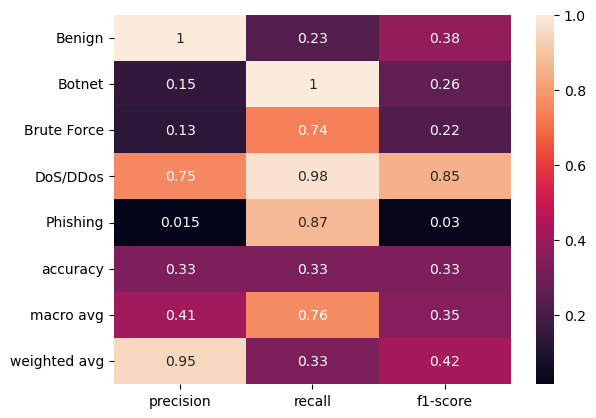

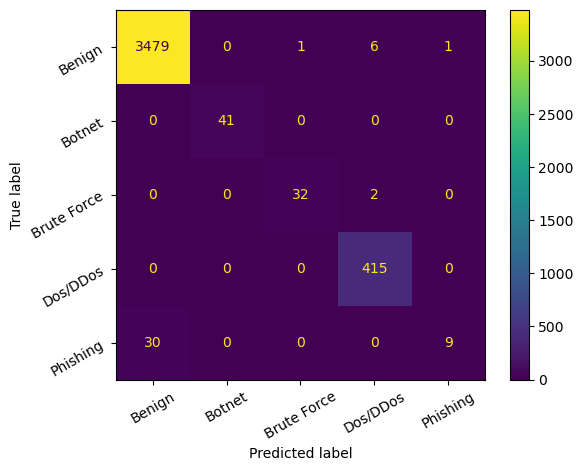


The heatmap for the classification table can be demonstrated as below: 



===============================NF-CSE-CIC-IDS2018-v2 SVM Classifier: : Model Evaluation ===========================

The mean score in 10-Fold cross validation is: 
 0.9140953586183794

The accuracy of the model in the training set is: 
 0.914093625498008

The visualization of the confusion matrix can be displayed as follows: 



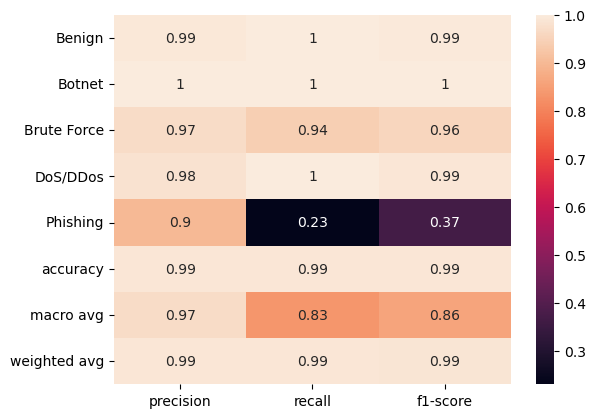

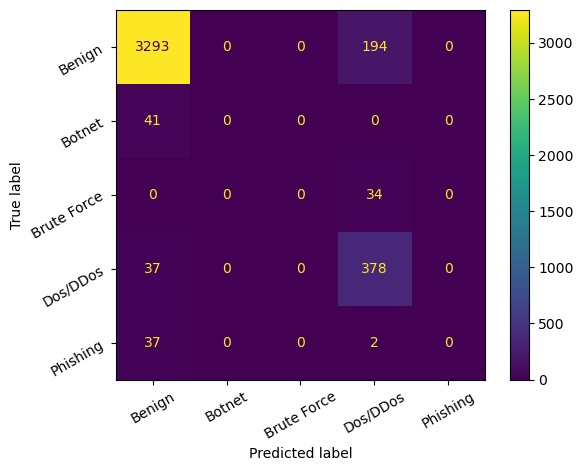


The heatmap for the classification table can be demonstrated as below: 




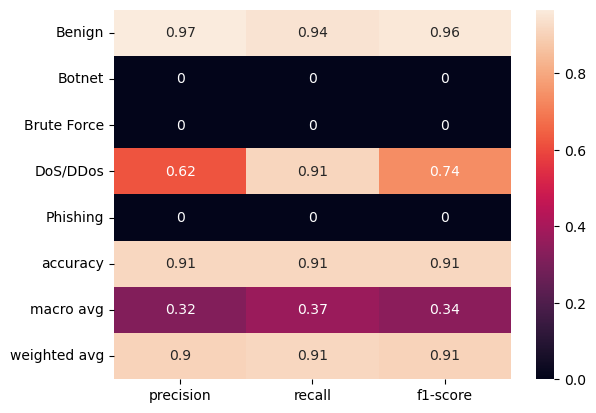

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

model2=[]
model2.append(("Decision Tree Classifier: ", DT2))
model2.append(("Naive Bayes Classifier: ", NB2))
model2.append(("K-Nearest Neighbor Classifier: ", KNN2))
model2.append(("SVM Classifier: ", SVM2))

group2_train_val_score=[]
for i, v in model2:
    scores_group2_train = cross_val_score(v, train_X_group2, train_y_group2, cv=10)
    group2_train_val_score.append(scores_group2_train)
    accuracy_group2_train = accuracy_score(train_y_group2, v.predict(train_X_group2))
    confusion_matrix_group2_train = confusion_matrix(train_y_group2, v.predict(train_X_group2))
    classification_report_group2_train = classification_report(train_y_group2, v.predict(train_X_group2), output_dict=True)
    print()
    print("==============================={} {}: Model Evaluation ===========================".format("NF-CSE-CIC-IDS2018-v2", i))
    print()
    print("The mean score in 10-Fold cross validation is: \n", scores_group2_train.mean())
    print()
    print("The accuracy of the model in the training set is: \n", accuracy_group2_train)
    print()
    print("The visualization of the confusion matrix can be displayed as follows: \n")
    cm_display_group2_train = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_group2_train, display_labels=["Benign", "Botnet", "Brute Force",
                                                                                                                       "Dos/DDos", "Phishing"])
    cm_display_group2_train.plot()
    plt.xticks(rotation=30)
    plt.yticks(rotation=30)
    plt.show()
    print()
    print("The heatmap for the classification table can be demonstrated as below: \n")
    sns.heatmap(pd.DataFrame(classification_report_group2_train).iloc[:-1,:].T, annot=True)
    print()


=====================================NF-CSE-CIC-IDS2018-v2 Decision Tree Classifier: : Model Evaluation ============================

The mean score in 10-Fold cross validation is: 
 0.9970297029702969

The accuracy of the model in the testing set is: 
 0.9990049751243781



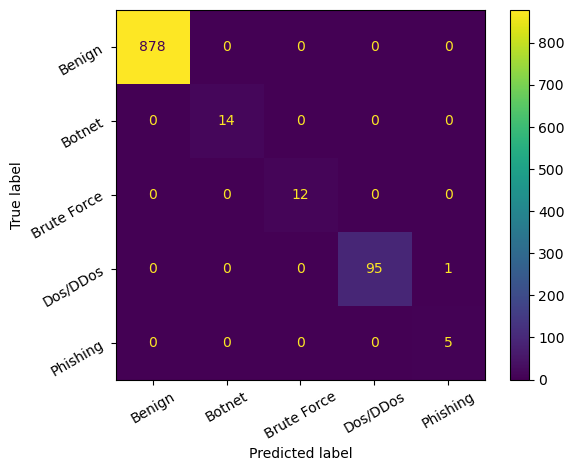


The heatmap for the classification table can be demonstrated as follows:



=====================================NF-CSE-CIC-IDS2018-v2 Naive Bayes Classifier: : Model Evaluation ============================

The mean score in 10-Fold cross validation is: 
 0.35319801980198023

The accuracy of the model in the testing set is: 
 0.3164179104477612



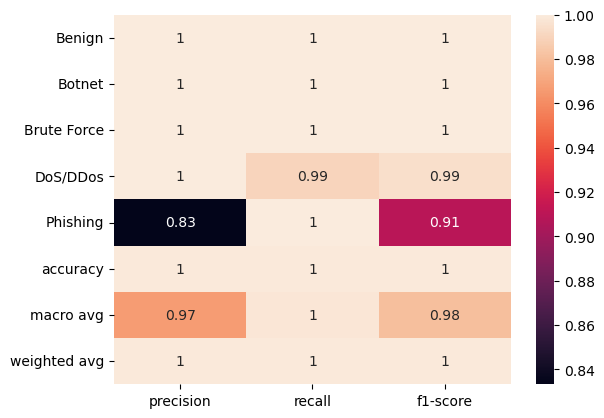

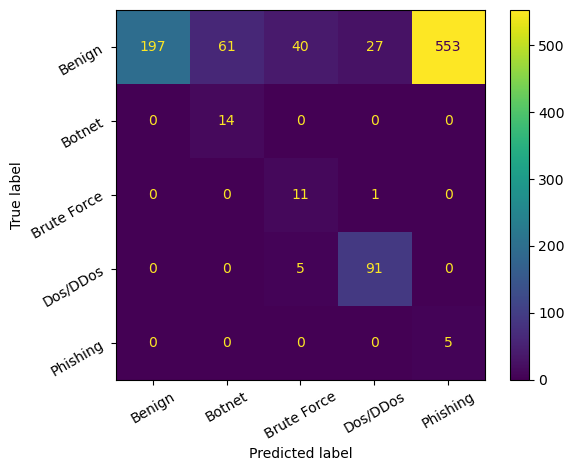


The heatmap for the classification table can be demonstrated as follows:



=====================================NF-CSE-CIC-IDS2018-v2 K-Nearest Neighbor Classifier: : Model Evaluation ============================

The mean score in 10-Fold cross validation is: 
 0.9851287128712871

The accuracy of the model in the testing set is: 
 0.9940298507462687



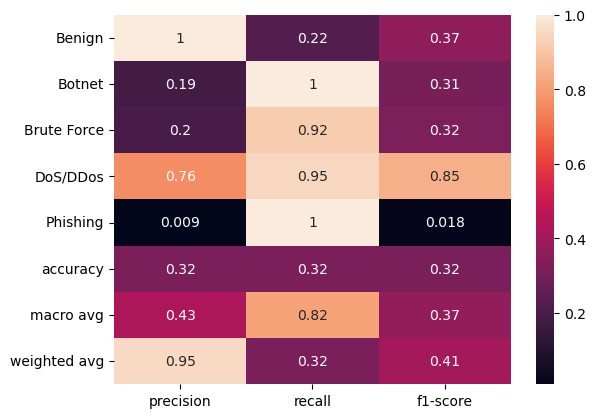

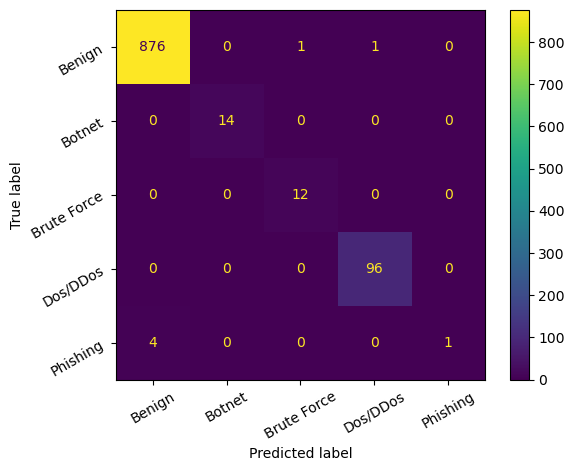


The heatmap for the classification table can be demonstrated as follows:



=====================================NF-CSE-CIC-IDS2018-v2 SVM Classifier: : Model Evaluation ============================

The mean score in 10-Fold cross validation is: 
 0.9193861386138614

The accuracy of the model in the testing set is: 
 0.9213930348258706



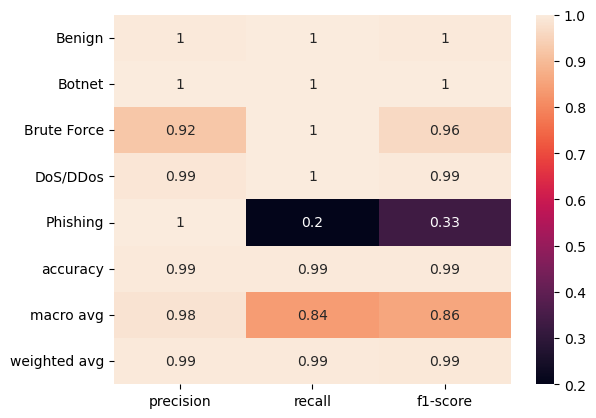

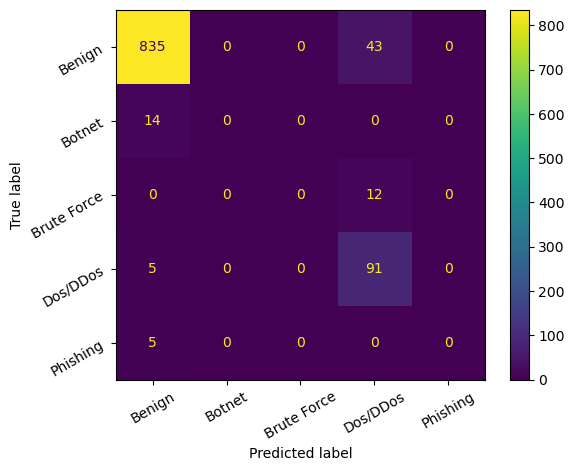


The heatmap for the classification table can be demonstrated as follows:




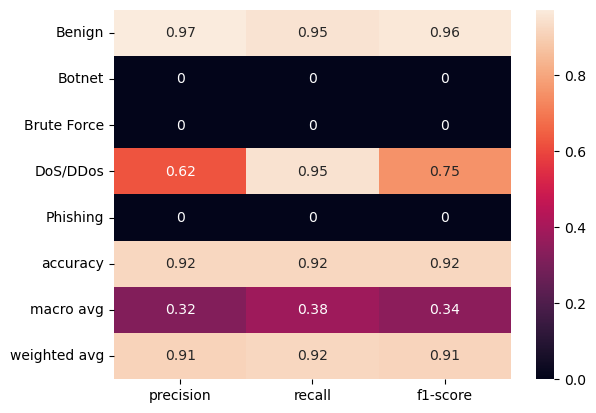

In [45]:
group2_test_val_score=[]
for i,v in model2:
    scores_group2_test = cross_val_score(v, test_X_group2, test_y_group2, cv=10)
    group2_test_val_score.append(scores_group2_test)
    accuracy_group2_test = accuracy_score(test_y_group2, v.predict(test_X_group2))
    confusion_matrix_group2_test = confusion_matrix(test_y_group2, v.predict(test_X_group2))
    classification_report_group2_test = classification_report(test_y_group2, v.predict(test_X_group2), output_dict=True)

    print()
    print("====================================={} {}: Model Evaluation ============================".format("NF-CSE-CIC-IDS2018-v2", i))
    print()
    print("The mean score in 10-Fold cross validation is: \n", scores_group2_test.mean())
    print()
    print("The accuracy of the model in the testing set is: \n", accuracy_group2_test)
    print()
    cm_display_group2_test = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_group2_test, display_labels=["Benign", "Botnet", "Brute Force",
                                                                                                                     "Dos/DDos", "Phishing"])
    cm_display_group2_test.plot()
    plt.xticks(rotation=30)
    plt.yticks(rotation=30)
    plt.show()
    print()
    print("The heatmap for the classification table can be demonstrated as follows:\n")
    sns.heatmap(pd.DataFrame(classification_report_group2_test).iloc[:-1,:].T, annot=True)
    print()

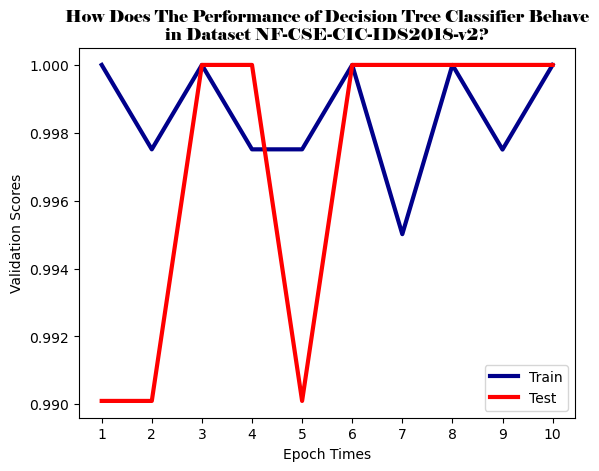

In [46]:
epoches_1_group2 = np.arange(1, 11, 1)
plt.plot(epoches_1_group2, group2_train_val_score[0], label="Train", color="darkblue", linewidth=3.0, alpha=1.0)
plt.plot(epoches_1_group2, group2_test_val_score[0], label="Test", color="red", linewidth=3.0, alpha=1.0)
plt.title("How Does The Performance of Decision Tree Classifier Behave" + 
          "\n" + "in Dataset NF-CSE-CIC-IDS2018-v2?", fontfamily="Elephant",
          fontweight="bold")
plt.xlabel("Epoch Times")
plt.ylabel("Validation Scores")
plt.xticks(epoches_1_group2)
plt.legend()
plt.show()

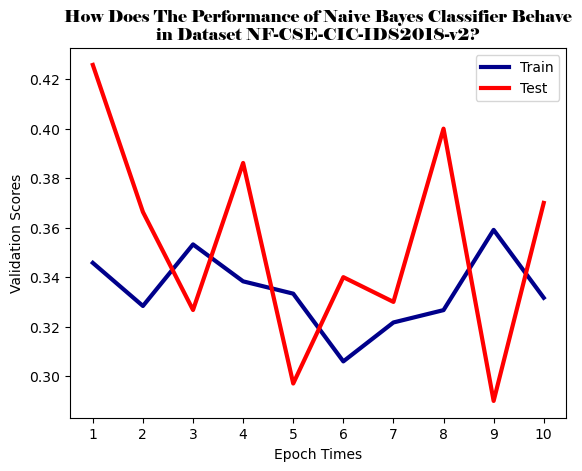

In [47]:
epoches_2_group2 = np.arange(1, 11, 1)
plt.plot(epoches_2_group2, group2_train_val_score[1], label="Train", color="darkblue", linewidth=3.0, alpha=1.0)
plt.plot(epoches_2_group2, group2_test_val_score[1], label="Test", color="red", linewidth=3.0, alpha=1.0)
plt.title("How Does The Performance of Naive Bayes Classifier Behave" + 
          "\n" + "in Dataset NF-CSE-CIC-IDS2018-v2?", fontfamily="Elephant",
          fontweight="bold")
plt.xlabel("Epoch Times")
plt.ylabel("Validation Scores")
plt.xticks(epoches_2_group2)
plt.legend()
plt.show()

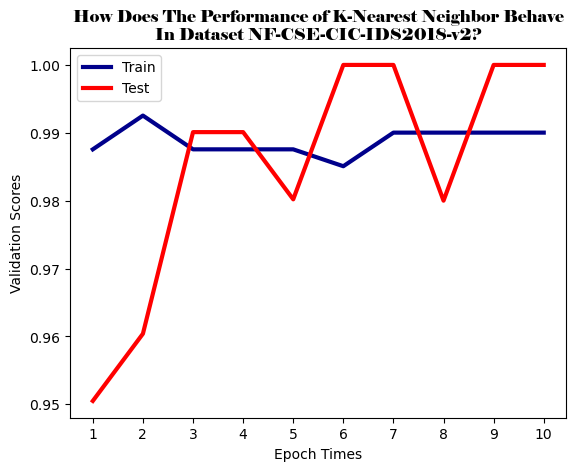

In [48]:
epoches_3_group2 = np.arange(1, 11, 1)
plt.plot(epoches_3_group2, group2_train_val_score[2], label="Train", color="darkblue", linewidth=3.0, alpha=1.0)
plt.plot(epoches_3_group2, group2_test_val_score[2], label="Test", color="red", linewidth=3.0, alpha=1.0)
plt.title("How Does The Performance of K-Nearest Neighbor Behave" + 
          "\n" + "In Dataset NF-CSE-CIC-IDS2018-v2?", fontfamily="Elephant",
          fontweight="bold")
plt.xlabel("Epoch Times")
plt.ylabel("Validation Scores")
plt.xticks(epoches_3_group2)
plt.legend()
plt.show()

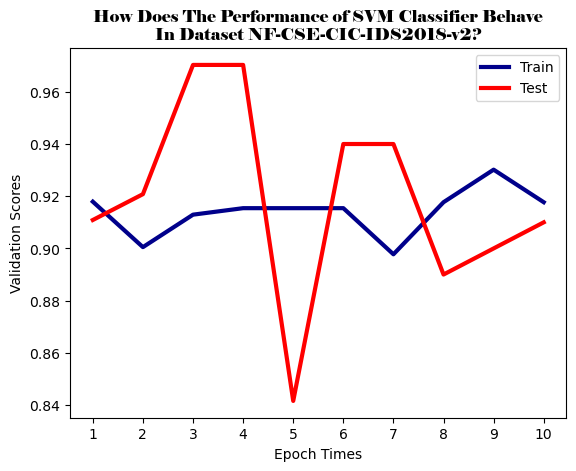

In [49]:
epoches_4_group2 = np.arange(1, 11, 1)
plt.plot(epoches_4_group2, group2_train_val_score[3], label="Train", color="darkblue", linewidth=3.0, alpha=1.0)
plt.plot(epoches_4_group2, group2_test_val_score[3], label="Test", color="red", linewidth=3.0, alpha=1.0)
plt.title("How Does The Performance of SVM Classifier Behave" + 
          "\n" + "In Dataset NF-CSE-CIC-IDS2018-v2?", fontfamily="Elephant",
          fontweight="bold")
plt.xlabel("Epoch Times")
plt.ylabel("Validation Scores")
plt.xticks(epoches_4_group2)
plt.legend()
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
train_X_group3, test_X_group3, train_y_group3, test_y_group3 = train_test_split(dataset_group_3, attack_group_3, train_size=0.8,
                                                                                test_size = 0.2)


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

DT3 = DecisionTreeClassifier()
DT3.fit(train_X_group3, train_y_group3)
NB3 = MultinomialNB()
NB3.fit(train_X_group3, train_y_group3)
KNN3 = KNeighborsClassifier()
KNN3.fit(train_X_group3, train_y_group3)
SVM3 = SVC()
SVM3.fit(train_X_group3, train_y_group3)

SVC()

In [52]:
network_finalized[network_finalized['Dataset'] == "NF-ToN-IoT-v2"]['Attack_Class'].value_counts()

Benign           1603
Phishing         1003
DoS/DDos          705
XSS               634
Password          286
SQL Injection     179
Name: Attack_Class, dtype: int64

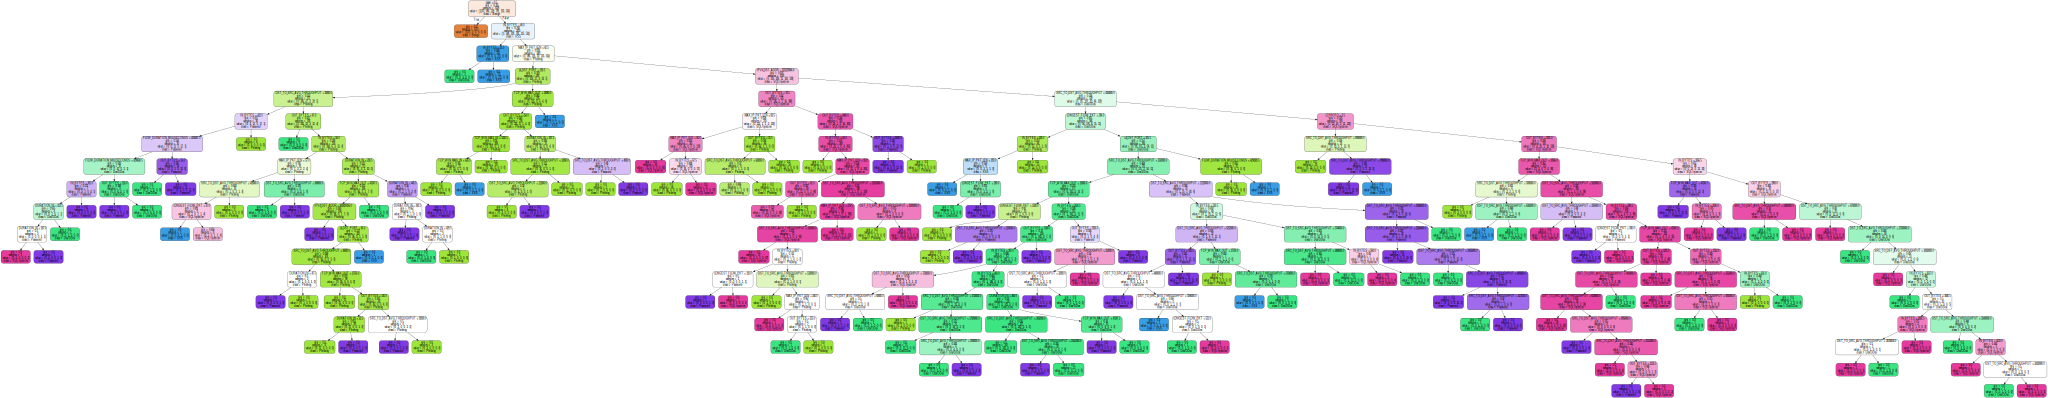

In [53]:
from sklearn.tree import export_graphviz
from graphviz import Source
import graphviz as g

dot_data_group3 = export_graphviz(DT3, out_file = None, feature_names = train_X_group3.columns,
                                  class_names = ['Benign', 'Phishing', 'Dos/DDos', 'XSS', 
                                  'Password', 'SQL Injection'], filled = True, rounded = True, special_characters = True)
graph_3 = g.Source(dot_data_group3)
graph_3


============================= NF-ToN-IoT-v2 Decision Tree Classifier:  Model Evaluation =============================

The mean score in 10-Fold Cross Validation is:  0.9608880054081895

The accuracy of the model in the training dataset is:  0.9946145124716553



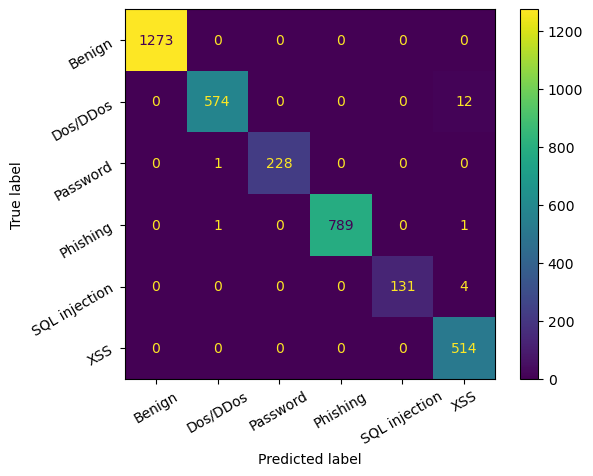


The heatmap of the classification table can be demonstrated as follows:



============================= NF-ToN-IoT-v2 Naive Bayes Classifier:  Model Evaluation =============================

The mean score in 10-Fold Cross Validation is:  0.4152523821787278

The accuracy of the model in the training dataset is:  0.41836734693877553



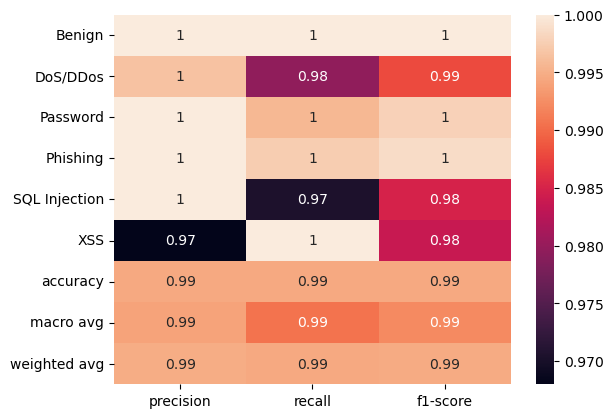

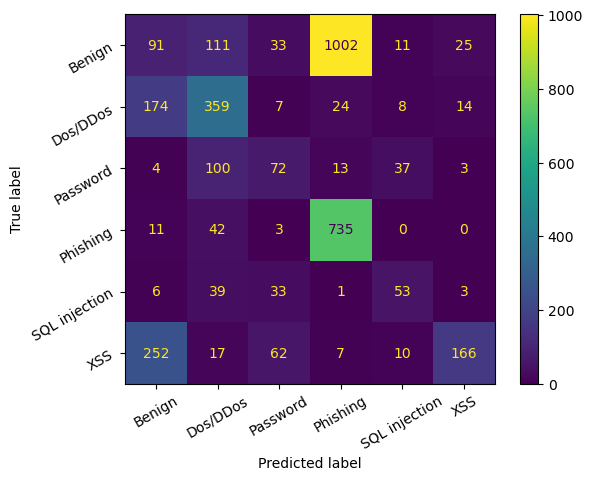


The heatmap of the classification table can be demonstrated as follows:



============================= NF-ToN-IoT-v2 K-Nearest Neighbour Classifier:  Model Evaluation =============================

The mean score in 10-Fold Cross Validation is:  0.914400109451455

The accuracy of the model in the training dataset is:  0.9336734693877551



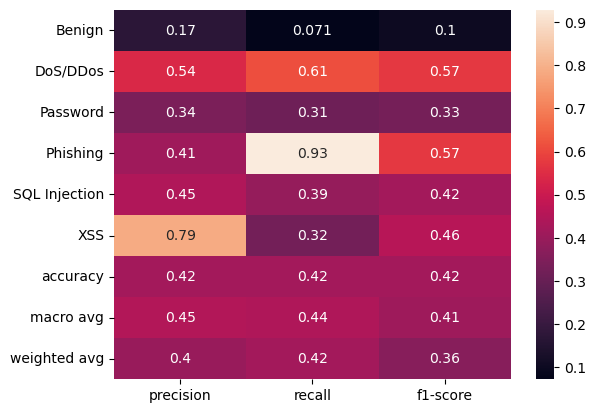

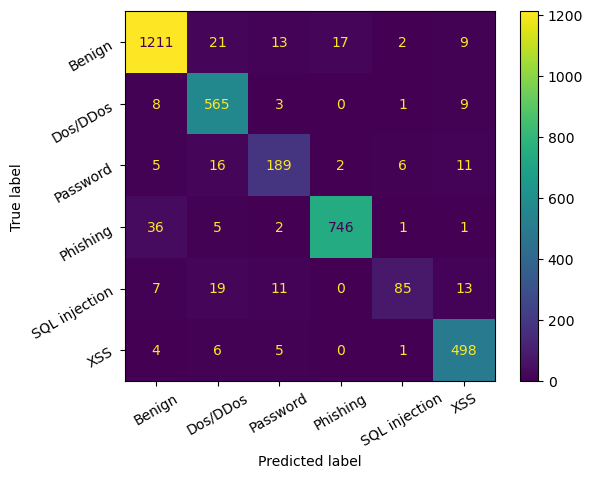


The heatmap of the classification table can be demonstrated as follows:



============================= NF-ToN-IoT-v2 SVM Classifier,  Model Evaluation =============================

The mean score in 10-Fold Cross Validation is:  0.3738668555240793

The accuracy of the model in the training dataset is:  0.3738662131519274



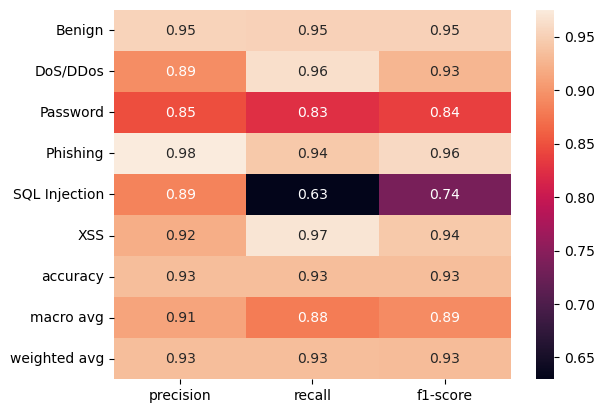

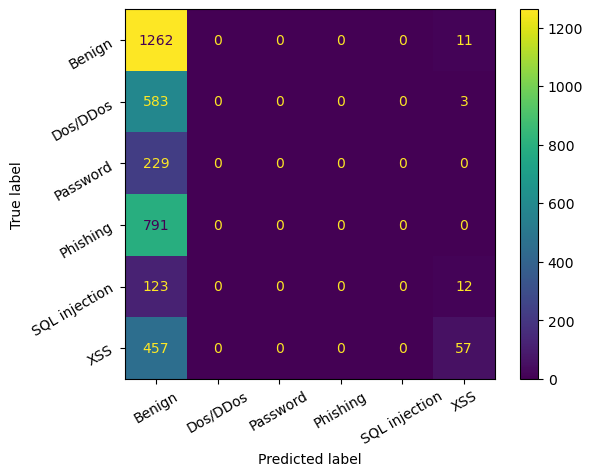


The heatmap of the classification table can be demonstrated as follows:




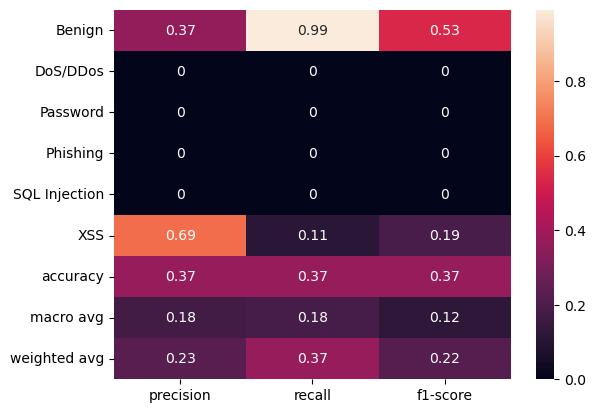

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

model3 = []
model3.append(("Decision Tree Classifier: ", DT3))
model3.append(("Naive Bayes Classifier: ", NB3))
model3.append(("K-Nearest Neighbour Classifier: ", KNN3))
model3.append(("SVM Classifier, ", SVM3))

group3_train_val_score = []
for i, v in model3:
    score_group3_train = cross_val_score(v, train_X_group3, train_y_group3, cv=10)
    group3_train_val_score.append(score_group3_train)
    accuracy_group3_train = accuracy_score(train_y_group3, v.predict(train_X_group3))
    confusion_matrix_group3_train = confusion_matrix(train_y_group3, v.predict(train_X_group3))
    classification_report_group3_train = classification_report(train_y_group3, v.predict(train_X_group3), output_dict=True)

    print()
    print("============================= {} {} Model Evaluation =============================".format("NF-ToN-IoT-v2", i))
    print()
    print("The mean score in 10-Fold Cross Validation is: ", score_group3_train.mean())
    print()
    print("The accuracy of the model in the training dataset is: ", accuracy_group3_train)
    print()
    cm_display_group3_train = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_group3_train, display_labels=["Benign", "Dos/DDos", "Password",
                                                                                                                       "Phishing", "SQL injection", "XSS"])
    cm_display_group3_train.plot()
    plt.xticks(rotation=30)
    plt.yticks(rotation=30)
    plt.show()
    print()
    print("The heatmap of the classification table can be demonstrated as follows:\n")
    sns.heatmap(pd.DataFrame(classification_report_group3_train).iloc[:-1,:].T, annot=True)
    print()   


===================================== NF-ToN-IoT-v2 Decision Tree Classifier:  Model Evaluation ==================================

The mean score in 10-Fold Cross Validation is:  0.9388278855975486

The accuracy of the model in the testing dataset is:  0.9501133786848073



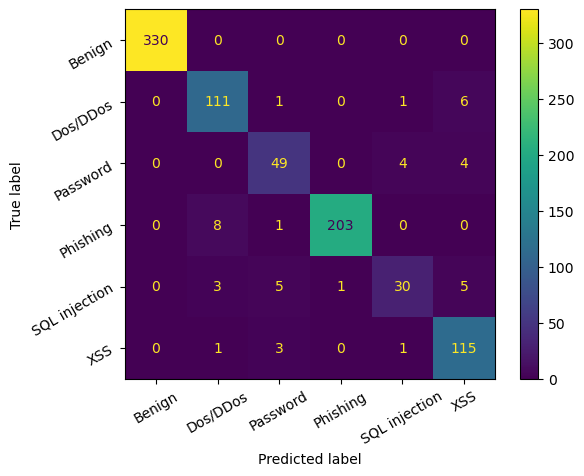


The heatmap of the classification table can be demonstrated as follows:



===================================== NF-ToN-IoT-v2 Naive Bayes Classifier:  Model Evaluation ==================================

The mean score in 10-Fold Cross Validation is:  0.4070224719101124

The accuracy of the model in the testing dataset is:  0.42857142857142855



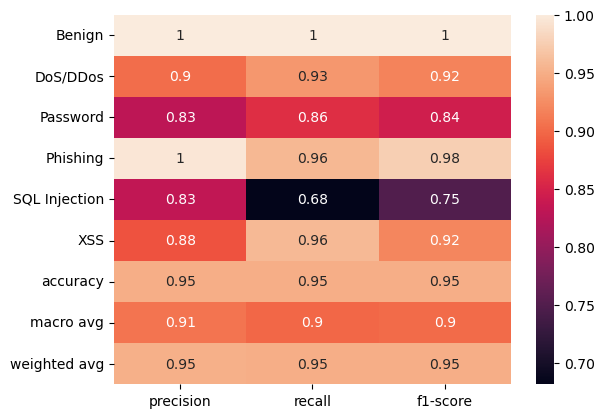

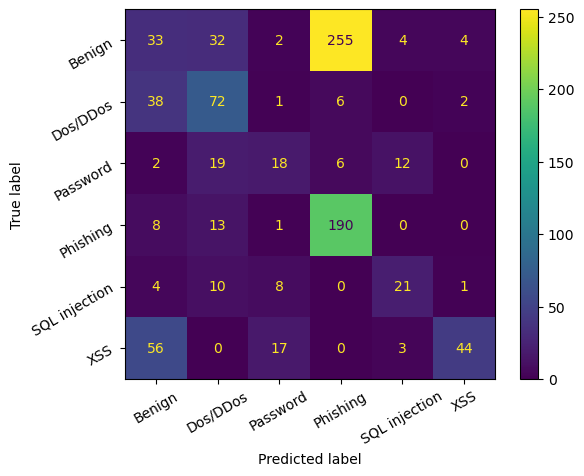


The heatmap of the classification table can be demonstrated as follows:



===================================== NF-ToN-IoT-v2 K-Nearest Neighbour Classifier:  Model Evaluation ==================================

The mean score in 10-Fold Cross Validation is:  0.8696246169560776

The accuracy of the model in the testing dataset is:  0.9149659863945578



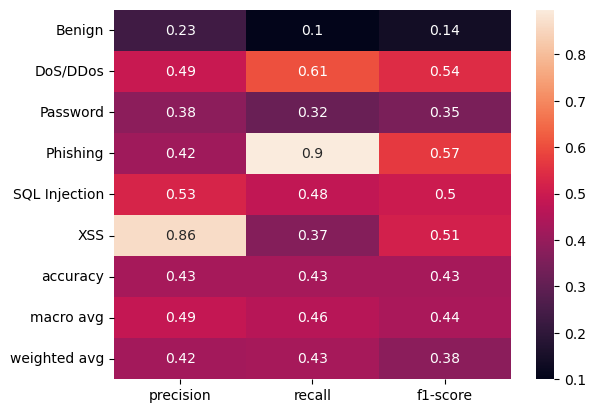

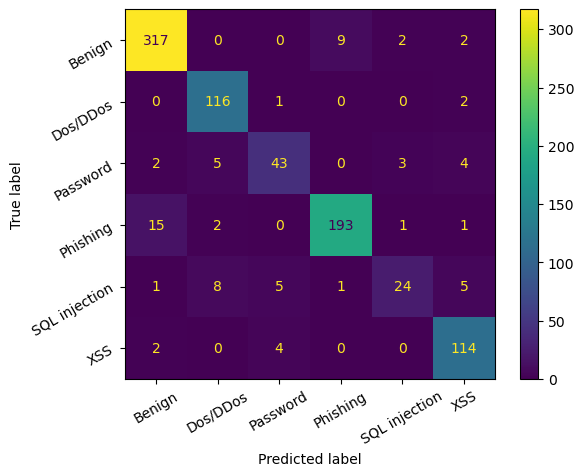


The heatmap of the classification table can be demonstrated as follows:



===================================== NF-ToN-IoT-v2 SVM Classifier,  Model Evaluation ==================================

The mean score in 10-Fold Cross Validation is:  0.38663176710929525

The accuracy of the model in the testing dataset is:  0.3866213151927438



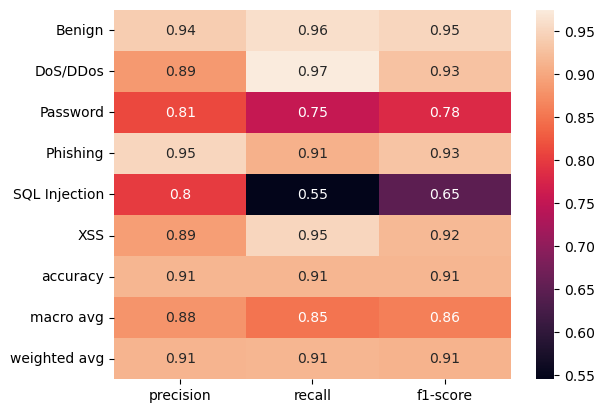

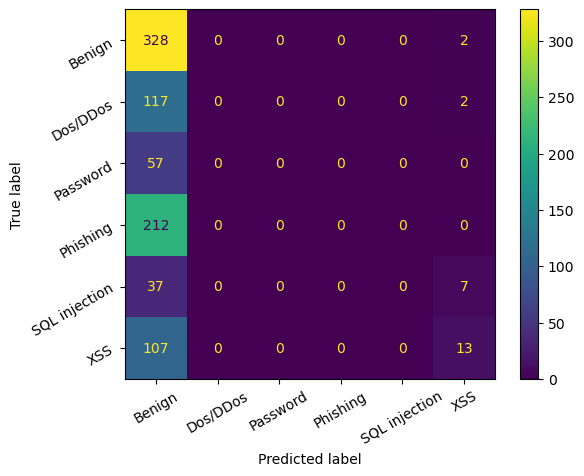


The heatmap of the classification table can be demonstrated as follows:




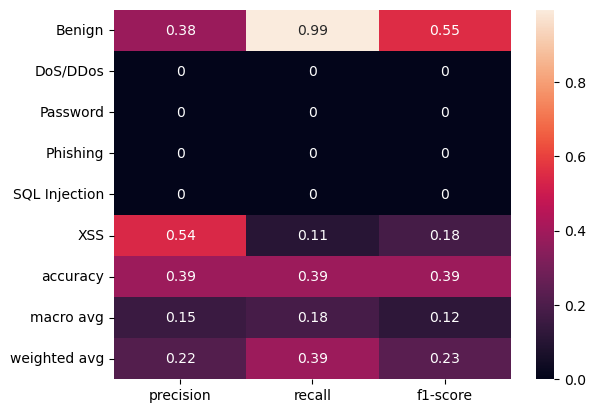

In [55]:
group3_test_val_score=[]
for i, v in model3:
    score_group3_test = cross_val_score(v, test_X_group3, test_y_group3, cv=10)
    group3_test_val_score.append(score_group3_test)
    accuracy_group3_test = accuracy_score(test_y_group3, v.predict(test_X_group3))
    confusion_matrix_group3_test = confusion_matrix(test_y_group3, v.predict(test_X_group3))
    classification_report_group3_test = classification_report(test_y_group3, v.predict(test_X_group3), output_dict=True)
    
    print()
    print("===================================== {} {} Model Evaluation ==================================".format("NF-ToN-IoT-v2", i))
    print()
    print("The mean score in 10-Fold Cross Validation is: ", score_group3_test.mean())
    print()
    print("The accuracy of the model in the testing dataset is: ", accuracy_group3_test)
    print()
    cm_display_group3_test = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_group3_test, display_labels=["Benign", "Dos/DDos", "Password",
                                                                                                                       "Phishing", "SQL injection", "XSS"])
    cm_display_group3_test.plot()
    plt.xticks(rotation=30)
    plt.yticks(rotation=30)
    plt.show()
    print()
    print("The heatmap of the classification table can be demonstrated as follows:\n")
    sns.heatmap(pd.DataFrame(classification_report_group3_test).iloc[:-1,:].T, annot=True)
    print()   

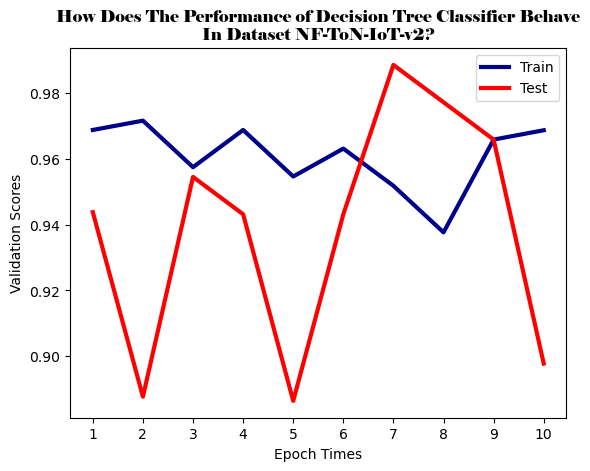

In [56]:
epoches_1_group3 = np.arange(1, 11, 1)
plt.plot(epoches_1_group1, group3_train_val_score[0], label="Train", color="darkblue", linewidth=3.0, alpha=1.0)
plt.plot(epoches_1_group3, group3_test_val_score[0], label="Test", color="red", linewidth=3.0, alpha=1.0)
plt.title("How Does The Performance of Decision Tree Classifier Behave" + 
          "\n" + "In Dataset NF-ToN-IoT-v2?", fontfamily="Elephant", fontweight="bold")
plt.xlabel("Epoch Times")
plt.ylabel("Validation Scores")
plt.xticks(epoches_3_group1)
plt.legend()
plt.show()

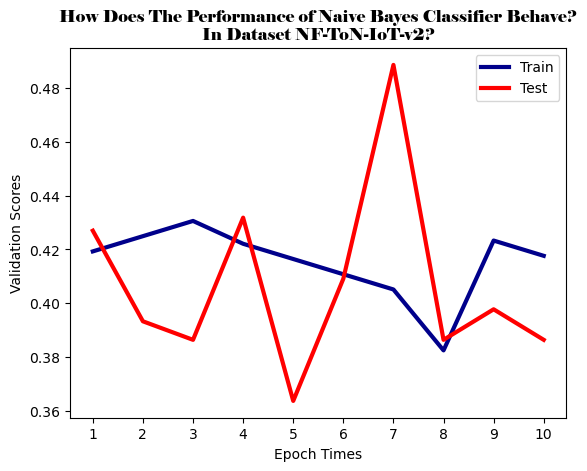

In [57]:
epoches_2_group3 = np.arange(1, 11, 1)
plt.plot(epoches_2_group3, group3_train_val_score[1], label="Train",color="darkblue", linewidth=3.0, alpha=1.0)
plt.plot(epoches_2_group3, group3_test_val_score[1], label="Test", color="red", linewidth=3.0, alpha=1.0)
plt.title("How Does The Performance of Naive Bayes Classifier Behave?" + 
          "\n" + "In Dataset NF-ToN-IoT-v2?", fontfamily="Elephant", fontweight="bold")
plt.xlabel("Epoch Times")
plt.ylabel("Validation Scores")
plt.xticks(epoches_2_group3)
plt.legend()
plt.show()

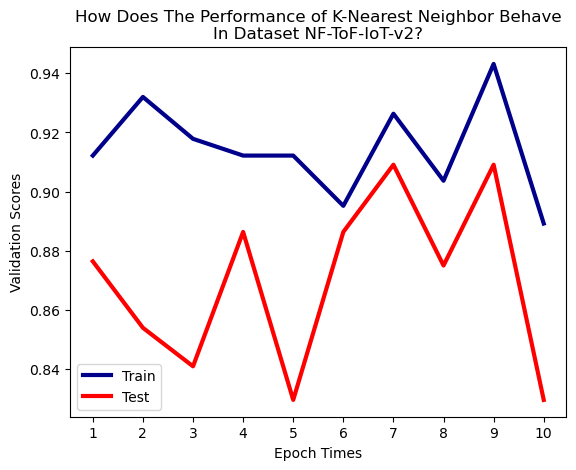

In [58]:
epoches_3_group3 = np.arange(1, 11, 1)
plt.plot(epoches_3_group3, group3_train_val_score[2], label="Train", color="darkblue", linewidth=3.0, alpha=1.0)
plt.plot(epoches_3_group3, group3_test_val_score[2], label="Test", color="red", linewidth=3.0, alpha=1.0)
plt.title("How Does The Performance of K-Nearest Neighbor Behave" + 
          "\n" + "In Dataset NF-ToF-IoT-v2?")
plt.xlabel("Epoch Times")
plt.ylabel("Validation Scores")
plt.xticks(epoches_3_group3)
plt.legend()
plt.show()

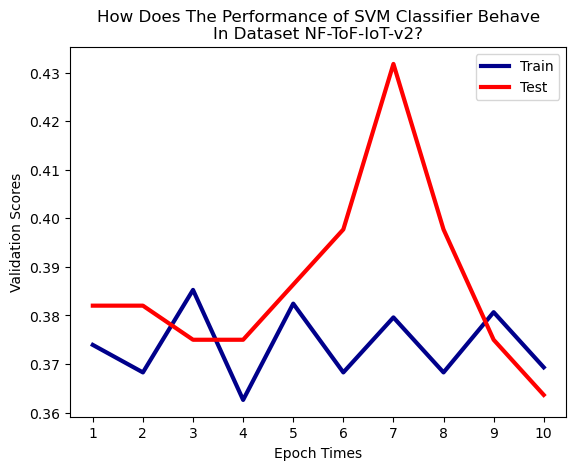

In [59]:
epoches_3_group4 = np.arange(1, 11, 1)
plt.plot(epoches_3_group4, group3_train_val_score[3], label="Train", color="darkblue", linewidth=3.0, alpha=1.0)
plt.plot(epoches_3_group4, group3_test_val_score[3], label="Test", color="red", linewidth=3.0, alpha=1.0)
plt.title("How Does The Performance of SVM Classifier Behave" +
          "\n" + "In Dataset NF-ToF-IoT-v2?")
plt.xlabel("Epoch Times")
plt.ylabel("Validation Scores")
plt.xticks(epoches_3_group4)
plt.legend()
plt.show()

In [60]:
from sklearn.model_selection import train_test_split
train_X_group4, test_X_group4, train_y_group4, test_y_group4 = train_test_split(dataset_group_4, attack_group_4, train_size = 0.55,
                                                                                test_size = 0.45)

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

DT4 = DecisionTreeClassifier()
DT4.fit(train_X_group4, train_y_group4)
NB4 = MultinomialNB()
NB4.fit(train_X_group4, train_y_group4)
KNN4 = KNeighborsClassifier()
KNN4.fit(train_X_group4, train_y_group4)
SVM4 = SVC()
SVM4.fit(train_X_group4, train_y_group4)

SVC()

In [62]:
network_finalized[network_finalized['Dataset'] == "NF-UNSW-NB15-v2"]["Attack_Class"].value_counts()

Benign              556
Phishing             10
Zero Day Exploit      9
Malware               4
DoS/DDos              3
Name: Attack_Class, dtype: int64

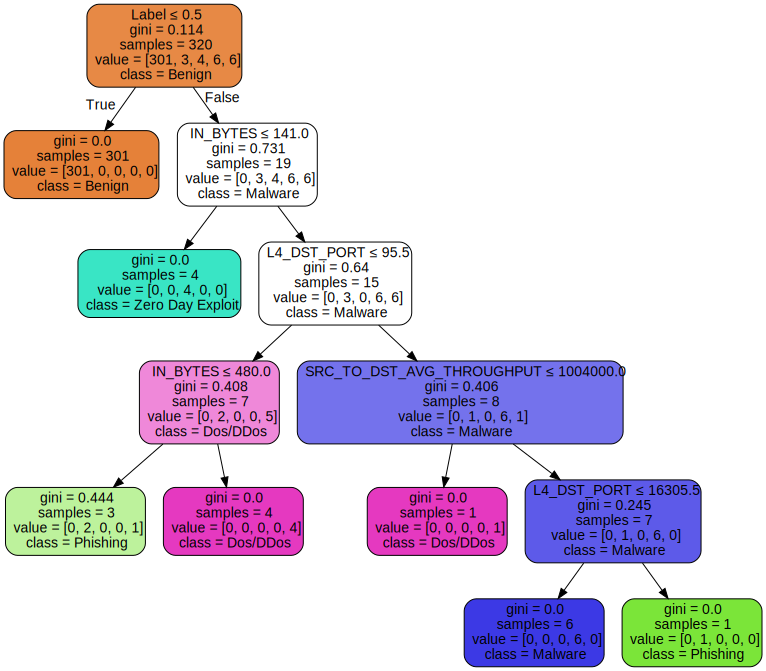

In [63]:
from sklearn.tree import export_graphviz
from graphviz import Source
import graphviz as g

dot_data_group4 = export_graphviz(DT4, out_file = None, feature_names = train_X_group4.columns,
                                  class_names = ['Benign', 'Phishing', 'Zero Day Exploit', 'Malware', 'Dos/DDos'],
                                  filled = True, rounded = True, special_characters = True)
graph_4 = g.Source(dot_data_group4)
graph_4



================================== NF-UNSW-NB15-v2 Decision Tree Classifier:  Model Evaluation =================================

The mean score in 10-Fold Cross Validation is:  0.984375

The accuracy of the model using the training dataset is:  1.0



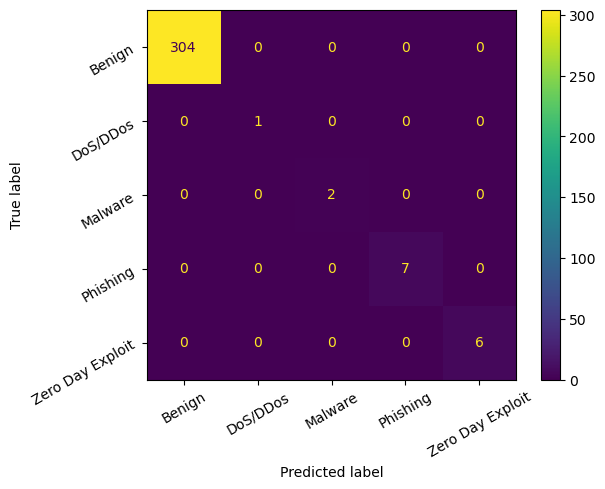




================================== NF-UNSW-NB15-v2 Naive Bayes Classifier:  Model Evaluation =================================

The mean score in 10-Fold Cross Validation is:  0.953125

The accuracy of the model using the training dataset is:  0.9625



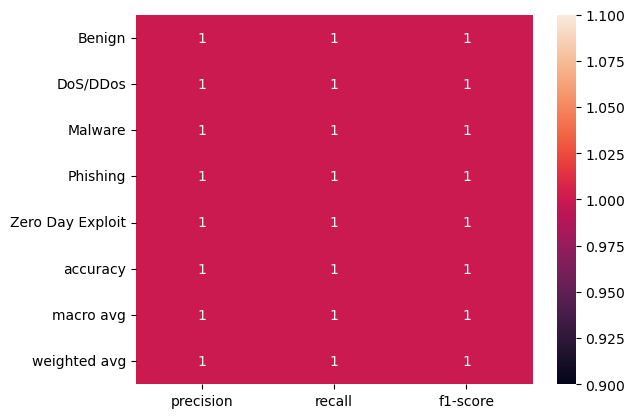

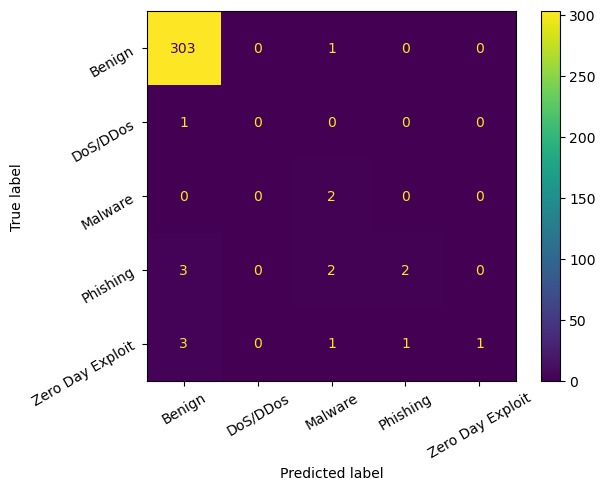




================================== NF-UNSW-NB15-v2 K-Nearest Neighbor Classifier:  Model Evaluation =================================

The mean score in 10-Fold Cross Validation is:  0.959375

The accuracy of the model using the training dataset is:  0.96875



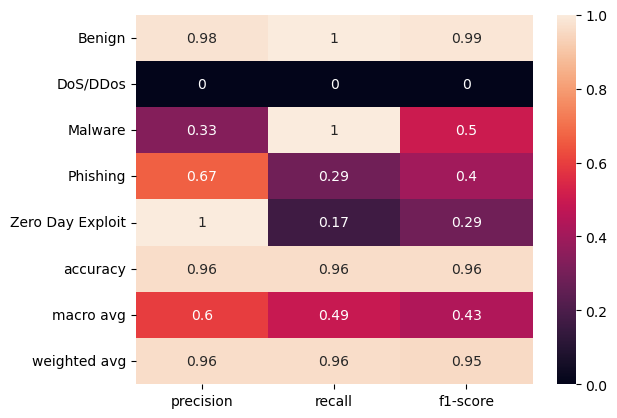

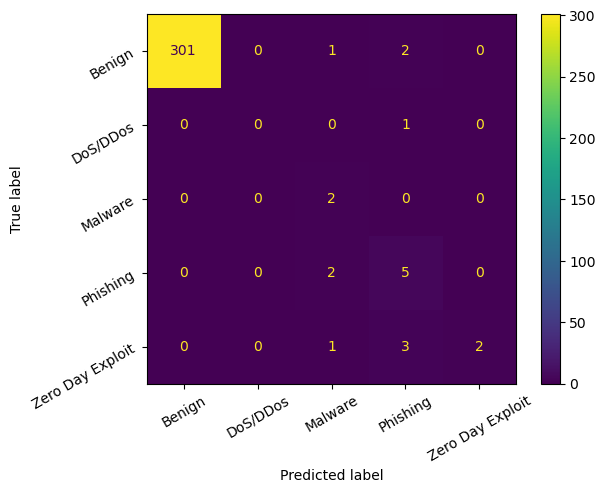




================================== NF-UNSW-NB15-v2 SVM Classifier:  Model Evaluation =================================

The mean score in 10-Fold Cross Validation is:  0.9625

The accuracy of the model using the training dataset is:  0.965625



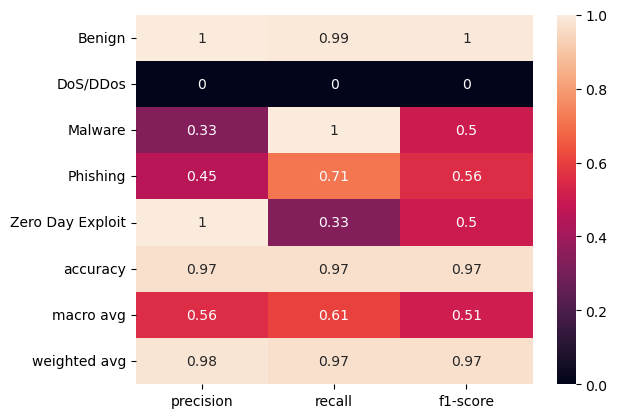

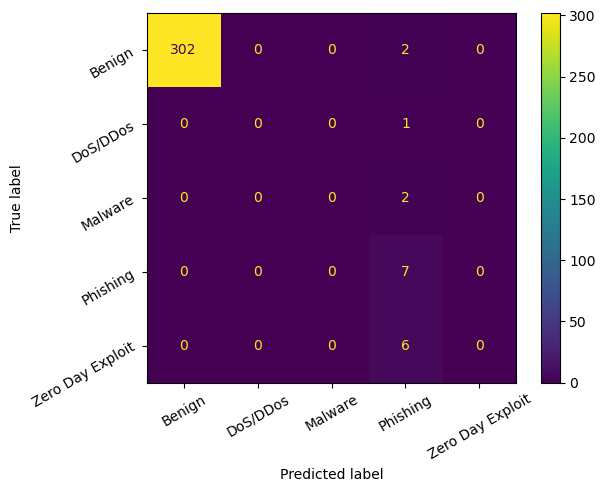

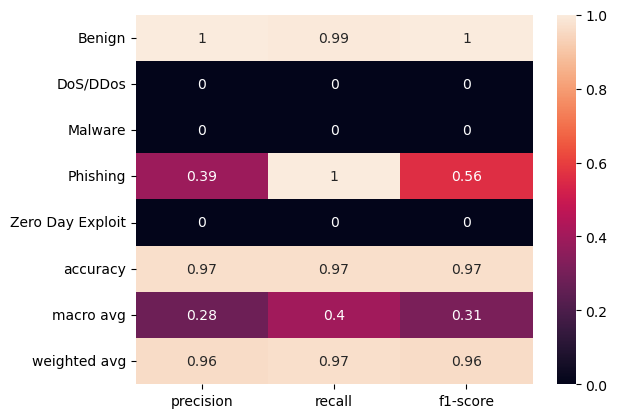

In [309]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

model4 = []
model4.append(("Decision Tree Classifier: ", DT4))
model4.append(("Naive Bayes Classifier: ", NB4))
model4.append(("K-Nearest Neighbor Classifier: ", KNN4))
model4.append(("SVM Classifier: ", SVM4))

group4_train_val_score = []
for i, v in model4:
    score_group4_train = cross_val_score(v, train_X_group4, train_y_group4, cv=10)
    group4_train_val_score.append(score_group4_train)
    accuracy_group4_train = accuracy_score(train_y_group4, v.predict(train_X_group4))
    confusion_matrix_group4_train = confusion_matrix(train_y_group4, v.predict(train_X_group4))
    classification_report_group4_train = classification_report(train_y_group4, v.predict(train_X_group4), output_dict=True)

    print()
    print("================================== {} {} Model Evaluation =================================".format("NF-UNSW-NB15-v2", i))
    print()
    print("The mean score in 10-Fold Cross Validation is: ", score_group4_train.mean())
    print()
    print("The accuracy of the model using the training dataset is: ", accuracy_group4_train)
    print()
    cm_display_group4_train = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_group4_train, display_labels=["Benign", "DoS/DDos",
                                                                                                                       "Malware", 
                                                                                                                       "Phishing", "Zero Day Exploit"])
    cm_display_group4_train.plot()
    plt.xticks(rotation=30)
    plt.yticks(rotation=30)
    plt.show()
    print()
    sns.heatmap(pd.DataFrame(classification_report_group4_train).iloc[:-1,:].T, annot=True)
    print()    


================================== NF-UNSW-NB15-v2 Decision Tree Classifier:  Model Evaluation ====================================

The mean score in 10-Fold Cross Validation is:  0.9846153846153847

The accuracy of the model using test dataset is:  0.9885496183206107



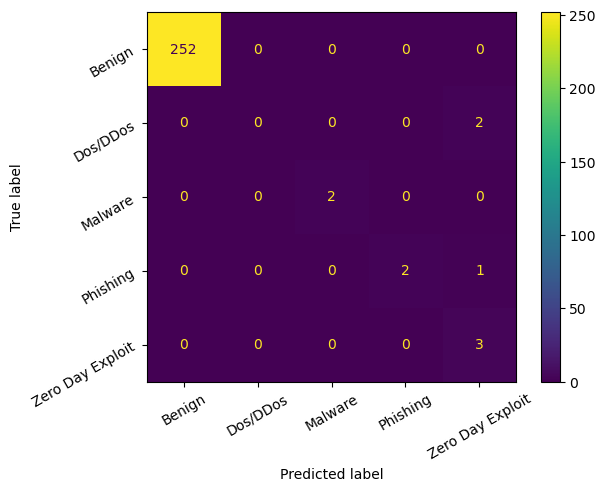




================================== NF-UNSW-NB15-v2 Naive Bayes Classifier:  Model Evaluation ====================================

The mean score in 10-Fold Cross Validation is:  0.9618233618233619

The accuracy of the model using test dataset is:  0.9694656488549618



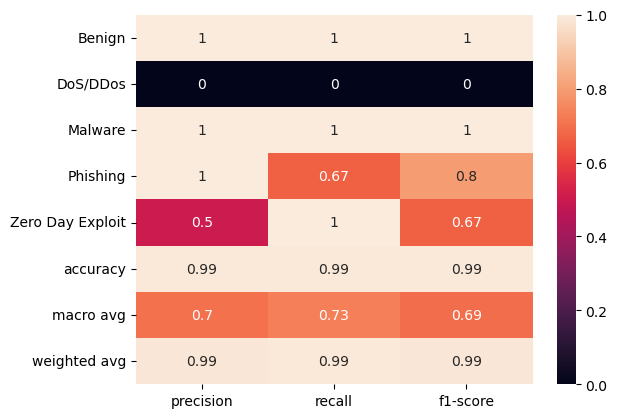

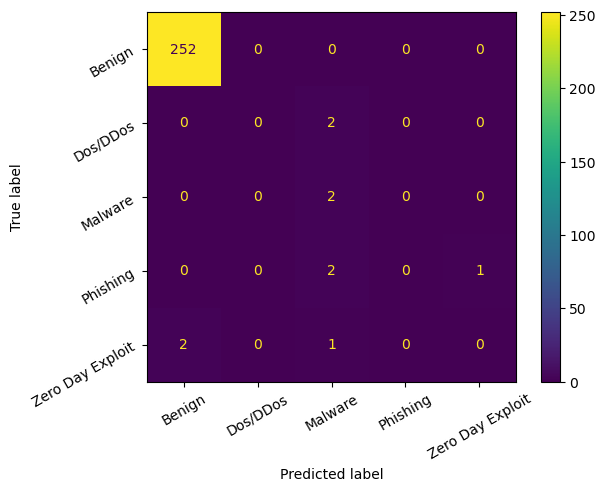




================================== NF-UNSW-NB15-v2 K-Nearest Neighbor Classifier:  Model Evaluation ====================================

The mean score in 10-Fold Cross Validation is:  0.954131054131054

The accuracy of the model using test dataset is:  0.9656488549618321



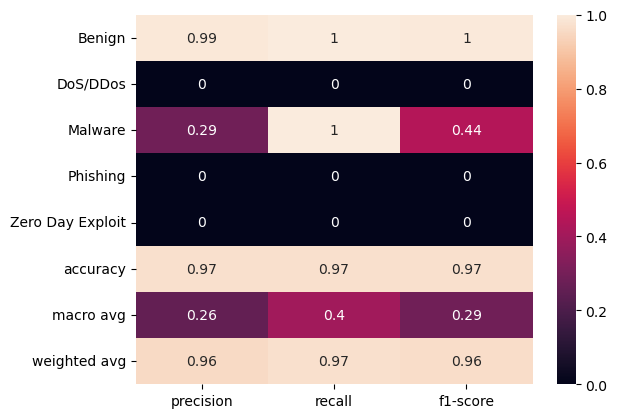

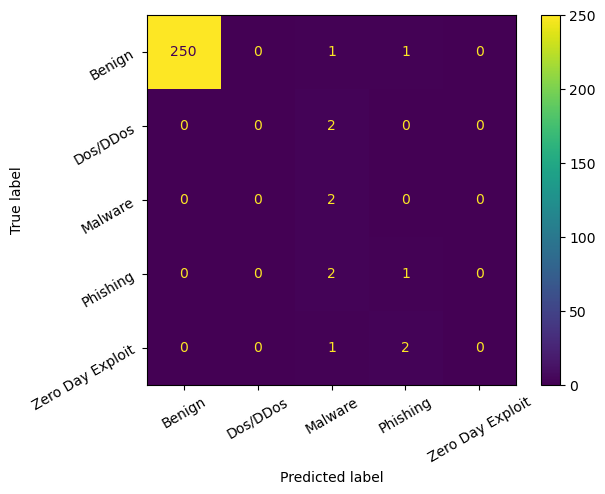




================================== NF-UNSW-NB15-v2 SVM Classifier:  Model Evaluation ====================================

The mean score in 10-Fold Cross Validation is:  0.954131054131054

The accuracy of the model using test dataset is:  0.9656488549618321



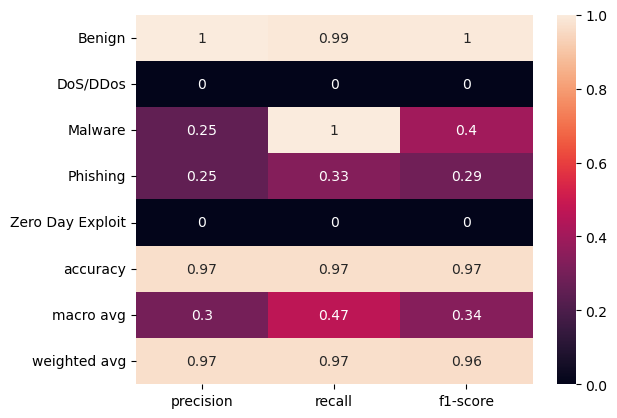

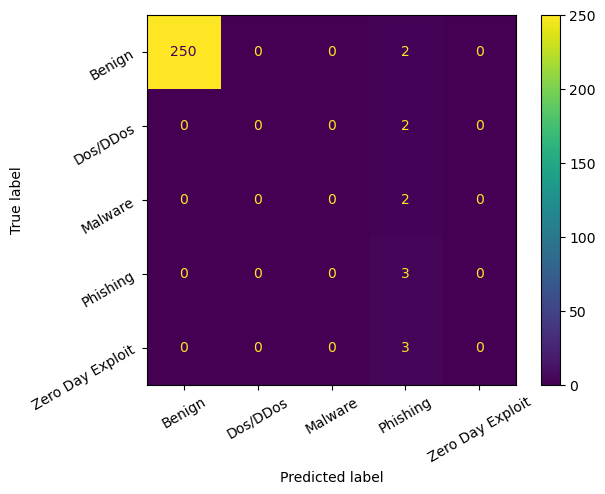

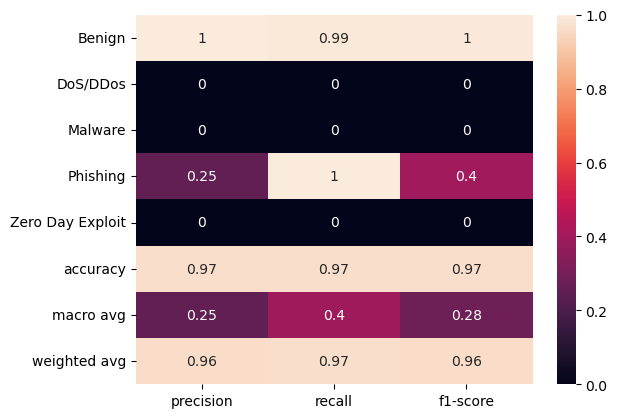

In [310]:
group4_test_val_score = []
for i, v in model4:
    score_group4_test = cross_val_score(v, test_X_group4, test_y_group4, cv=10)
    group4_test_val_score.append(score_group4_test)
    accuracy_group4_test = accuracy_score(test_y_group4, v.predict(test_X_group4))
    confusion_matrix_group4_test = confusion_matrix(test_y_group4, v.predict(test_X_group4))
    classification_report_group4_test = classification_report(test_y_group4, v.predict(test_X_group4), output_dict = True)

    print()
    print("================================== {} {} Model Evaluation ====================================".format("NF-UNSW-NB15-v2", i))
    print()
    print("The mean score in 10-Fold Cross Validation is: ", score_group4_test.mean())
    print()
    print("The accuracy of the model using test dataset is: ", accuracy_group4_test)
    print()
    cm_display_group4_test = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_group4_test, display_labels = ['Benign', "Dos/DDos", 
                                                                                                                       "Malware", "Phishing",
                                                                                                                       "Zero Day Exploit"])
    cm_display_group4_test.plot()
    plt.xticks(rotation = 30)
    plt.yticks(rotation = 30)
    plt.show()
    print()
    sns.heatmap(pd.DataFrame(classification_report_group4_test).iloc[:-1,:].T, annot=True)
    print()

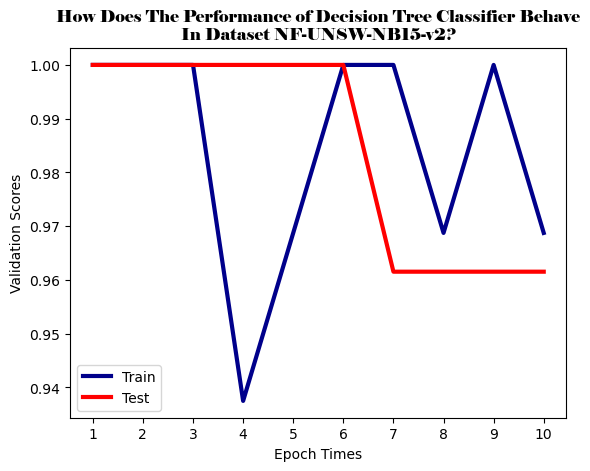

In [311]:
epoches_1_group4 = np.arange(1, 11, 1)
plt.plot(epoches_1_group4, group4_train_val_score[0], label="Train", color="darkblue", linewidth=3.0, alpha=1.0)
plt.plot(epoches_1_group4, group4_test_val_score[0], label="Test", color="red", linewidth=3.0, alpha=1.0)
plt.title("How Does The Performance of Decision Tree Classifier Behave"
          + "\n" + "In Dataset NF-UNSW-NB15-v2?", fontfamily="Elephant", fontweight="bold")
plt.xlabel("Epoch Times")
plt.ylabel("Validation Scores")
plt.xticks(epoches_1_group4)
plt.legend()
plt.show()

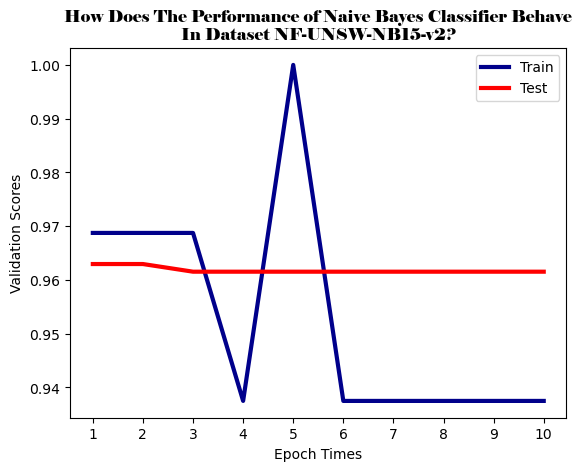

In [312]:
epoches_2_group4 = np.arange(1, 11, 1)
plt.plot(epoches_2_group4, group4_train_val_score[1], label="Train", color="darkblue", linewidth=3.0, alpha=1.0)
plt.plot(epoches_2_group4, group4_test_val_score[1], label="Test", color="red", linewidth=3.0, alpha=1.0)
plt.title("How Does The Performance of Naive Bayes Classifier Behave"
          + "\n" + "In Dataset NF-UNSW-NB15-v2?", fontfamily="Elephant", fontweight="bold")
plt.xlabel("Epoch Times")
plt.ylabel("Validation Scores")
plt.xticks(epoches_2_group4)
plt.legend()
plt.show()

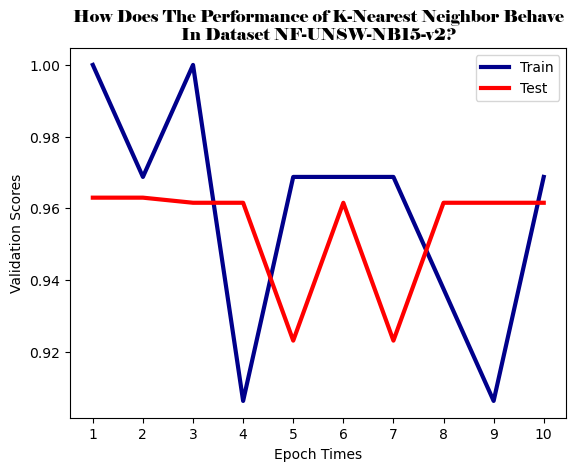

In [313]:
epoches_3_group4 = np.arange(1, 11, 1)
plt.plot(epoches_3_group4, group4_train_val_score[2], label="Train", color="darkblue", linewidth=3.0, alpha=1.0)
plt.plot(epoches_3_group4, group4_test_val_score[2], label="Test", color="red", linewidth=3.0, alpha=1.0)
plt.title("How Does The Performance of K-Nearest Neighbor Behave"
          + "\n" + "In Dataset NF-UNSW-NB15-v2?", family="Elephant", fontweight="bold")
plt.xlabel("Epoch Times")
plt.ylabel("Validation Scores")
plt.xticks(epoches_3_group4)
plt.legend()
plt.show()

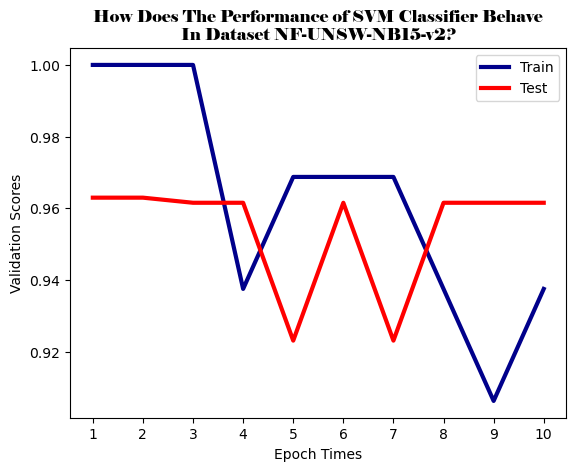

In [314]:
epoches_4_group4 = np.arange(1, 11, 1)
plt.plot(epoches_4_group4, group4_train_val_score[3], label="Train", color="darkblue", linewidth=3.0, alpha=1.0)
plt.plot(epoches_4_group4, group4_test_val_score[3], label="Test", color="red", linewidth=3.0, alpha=1.0)
plt.title("How Does The Performance of SVM Classifier Behave" 
          + "\n" + "In Dataset NF-UNSW-NB15-v2?", fontfamily="Elephant", fontweight="bold")
plt.xlabel("Epoch Times")
plt.ylabel("Validation Scores")
plt.xticks(epoches_4_group4)
plt.legend()
plt.show()